In [1]:
%env KERAS_BACKEND = tensorflow

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
from PIL import ImageEnhance

env: KERAS_BACKEND=tensorflow


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D,MaxPool2D #2D 矩陣
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input
from keras.optimizers import SGD
from keras.models import Model


Using TensorFlow backend.


# 加入高斯噪音來增加造片資料量

# 和加入銳利化

# 並均衡光度影響照片的可能性

In [4]:
def clamp(pv):
    if pv > 255:
        return 255
    if pv < 0:
        return 0
    else:
        return pv

for dicname in os.listdir(r"./"+"test_model_picture_2/"):   
    print(dicname)
    for filename in os.listdir(r"./"+"test_model_picture_2/"+dicname):
        print(filename) #just for test
        #img is used to store the image data 
        img = cv2.imread(r"./"+"test_model_picture_2/"+dicname + "/" + filename)
        if img.shape[0] <100:
            print("too small")
        else:
            img_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
            img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
            img_yuv = cv2.cvtColor(img_yuv,cv2.COLOR_YUV2BGR)
            cv2.imwrite(r"./"+"test_model_picture_2/"+dicname + "/"+"equv"+filename,img_yuv)
            height, weight,_ = img.shape
            for row in range(height):
                for col in range(weight):
                    s = np.random.normal(0, 20, 3)
                    b = img[row, col, 0]   # blue
                    g = img[row, col, 1]   # green
                    r = img[row, col, 2]   # red
                    img[row, col, 0] = clamp(b + s[0])
                    img[row, col, 1] = clamp(g + s[1])
                    img[row, col, 2] = clamp(r + s[2])
            img_pil = Image.open(r"./"+"test_model_picture_2/"+dicname + "/" + filename)
            img_rot = img_pil.transpose(Image.FLIP_LEFT_RIGHT)
            img_enhancer = ImageEnhance.Brightness(img_pil)
            img_enhancer = img_enhancer.enhance(1.7)
            img_rot.save(r"./"+"test_model_picture_2/"+dicname + "/"+"rot"+filename)
            img_enhancer.save(r"./"+"test_model_picture_2/"+dicname + "/"+"EN"+filename)
            cv2.imwrite(r"./"+"test_model_picture_2/"+dicname + "/"+"GN"+filename,img)

0.75
3_400001.jpg
too small
3_400002.jpg
too small
3_400003.jpg
3_400004.jpg
too small
3_400005.jpg
3_400006.jpg
too small
3_400007.jpg
too small
3_400008.jpg
too small
3_400009.jpg
3_400010.jpg
too small
3_400011.jpg
too small
3_400012.jpg
too small
3_400013.jpg
too small
3_400014.jpg
too small
3_400015.jpg
too small
3_400016.jpg
3_400017.jpg
too small
3_400018.jpg
too small
3_400019.jpg
3_400020.jpg
too small
3_400021.jpg
too small
3_400022.jpg
too small
3_400023.jpg
too small
3_400024.jpg
3_400025.jpg
3_400026.jpg
too small
3_400027.jpg
too small
3_400028.jpg
3_400029.jpg
3_400030.jpg
3_400031.jpg
too small
3_400032.jpg
too small
3_400033.jpg
too small
3_400034.jpg
too small
3_400035.jpg
too small
3_400036.jpg
3_400037.jpg
too small
3_400038.jpg
too small
3_400039.jpg
too small
3_400040.jpg
too small
3_400041.jpg
too small
3_400042.jpg
3_400043.jpg
too small
3_400044.jpg
3_400045.jpg
too small
3_400046.jpg
too small
3_400047.jpg
3_400048.jpg
3_400049.jpg
3_400050.jpg
too small
3_400

ENGN3_400077.jpg
ENGN3_400080.jpg
ENGN3_400084.jpg
ENGN3_400089.jpg
ENGN3_400095.jpg
ENGN3_400096.jpg
ENGNEN3_400003.jpg
ENGNEN3_400005.jpg
ENGNEN3_400009.jpg
ENGNEN3_400016.jpg
ENGNEN3_400019.jpg
ENGNEN3_400024.jpg
ENGNEN3_400025.jpg
ENGNEN3_400028.jpg
ENGNEN3_400029.jpg
ENGNEN3_400030.jpg
ENGNEN3_400036.jpg
ENGNEN3_400042.jpg
ENGNEN3_400044.jpg
ENGNEN3_400047.jpg
ENGNEN3_400048.jpg
ENGNEN3_400049.jpg
ENGNEN3_400051.jpg
ENGNEN3_400052.jpg
ENGNEN3_400054.jpg
ENGNEN3_400056.jpg
ENGNEN3_400058.jpg
ENGNEN3_400060.jpg
ENGNEN3_400061.jpg
ENGNEN3_400062.jpg
ENGNEN3_400064.jpg
ENGNEN3_400068.jpg
ENGNEN3_400071.jpg
ENGNEN3_400077.jpg
ENGNEN3_400080.jpg
ENGNEN3_400084.jpg
ENGNEN3_400089.jpg
ENGNEN3_400095.jpg
ENGNEN3_400096.jpg
ENGNequv3_400003.jpg
ENGNequv3_400005.jpg
ENGNequv3_400009.jpg
ENGNequv3_400016.jpg
ENGNequv3_400019.jpg
ENGNequv3_400024.jpg
ENGNequv3_400025.jpg
ENGNequv3_400028.jpg
ENGNequv3_400029.jpg
ENGNequv3_400030.jpg
ENGNequv3_400036.jpg
ENGNequv3_400042.jpg
ENGNequv3_400044.jp

equvequvGN3_400068.jpg
equvequvGN3_400071.jpg
equvequvGN3_400077.jpg
equvequvGN3_400080.jpg
equvequvGN3_400084.jpg
equvequvGN3_400089.jpg
equvequvGN3_400095.jpg
equvequvGN3_400096.jpg
equvGN3_400003.jpg
equvGN3_400005.jpg
equvGN3_400009.jpg
equvGN3_400016.jpg
equvGN3_400019.jpg
equvGN3_400024.jpg
equvGN3_400025.jpg
equvGN3_400028.jpg
equvGN3_400029.jpg
equvGN3_400030.jpg
equvGN3_400036.jpg
equvGN3_400042.jpg
equvGN3_400044.jpg
equvGN3_400047.jpg
equvGN3_400048.jpg
equvGN3_400049.jpg
equvGN3_400051.jpg
equvGN3_400052.jpg
equvGN3_400054.jpg
equvGN3_400056.jpg
equvGN3_400058.jpg
equvGN3_400060.jpg
equvGN3_400061.jpg
equvGN3_400062.jpg
equvGN3_400064.jpg
equvGN3_400068.jpg
equvGN3_400071.jpg
equvGN3_400077.jpg
equvGN3_400080.jpg
equvGN3_400084.jpg
equvGN3_400089.jpg
equvGN3_400095.jpg
equvGN3_400096.jpg
equvGNEN3_400003.jpg
equvGNEN3_400005.jpg
equvGNEN3_400009.jpg
equvGNEN3_400016.jpg
equvGNEN3_400019.jpg
equvGNEN3_400024.jpg
equvGNEN3_400025.jpg
equvGNEN3_400028.jpg
equvGNEN3_400029.jpg


GNequvGN3_400029.jpg
GNequvGN3_400030.jpg
GNequvGN3_400036.jpg
GNequvGN3_400042.jpg
GNequvGN3_400044.jpg
GNequvGN3_400047.jpg
GNequvGN3_400048.jpg
GNequvGN3_400049.jpg
GNequvGN3_400051.jpg
GNequvGN3_400052.jpg
GNequvGN3_400054.jpg
GNequvGN3_400056.jpg
GNequvGN3_400058.jpg
GNequvGN3_400060.jpg
GNequvGN3_400061.jpg
GNequvGN3_400062.jpg
GNequvGN3_400064.jpg
GNequvGN3_400068.jpg
GNequvGN3_400071.jpg
GNequvGN3_400077.jpg
GNequvGN3_400080.jpg
GNequvGN3_400084.jpg
GNequvGN3_400089.jpg
GNequvGN3_400095.jpg
GNequvGN3_400096.jpg
GNGN3_400003.jpg
GNGN3_400005.jpg
GNGN3_400009.jpg
GNGN3_400016.jpg
GNGN3_400019.jpg
GNGN3_400024.jpg
GNGN3_400025.jpg
GNGN3_400028.jpg
GNGN3_400029.jpg
GNGN3_400030.jpg
GNGN3_400036.jpg
GNGN3_400042.jpg
GNGN3_400044.jpg
GNGN3_400047.jpg
GNGN3_400048.jpg
GNGN3_400049.jpg
GNGN3_400051.jpg
GNGN3_400052.jpg
GNGN3_400054.jpg
GNGN3_400056.jpg
GNGN3_400058.jpg
GNGN3_400060.jpg
GNGN3_400061.jpg
GNGN3_400062.jpg
GNGN3_400064.jpg
GNGN3_400068.jpg
GNGN3_400071.jpg
GNGN3_400077.jpg

rotequvequv3_400071.jpg
rotequvequv3_400077.jpg
rotequvequv3_400080.jpg
rotequvequv3_400084.jpg
rotequvequv3_400089.jpg
rotequvequv3_400095.jpg
rotequvequv3_400096.jpg
rotequvGN3_400003.jpg
rotequvGN3_400005.jpg
rotequvGN3_400009.jpg
rotequvGN3_400016.jpg
rotequvGN3_400019.jpg
rotequvGN3_400024.jpg
rotequvGN3_400025.jpg
rotequvGN3_400028.jpg
rotequvGN3_400029.jpg
rotequvGN3_400030.jpg
rotequvGN3_400036.jpg
rotequvGN3_400042.jpg
rotequvGN3_400044.jpg
rotequvGN3_400047.jpg
rotequvGN3_400048.jpg
rotequvGN3_400049.jpg
rotequvGN3_400051.jpg
rotequvGN3_400052.jpg
rotequvGN3_400054.jpg
rotequvGN3_400056.jpg
rotequvGN3_400058.jpg
rotequvGN3_400060.jpg
rotequvGN3_400061.jpg
rotequvGN3_400062.jpg
rotequvGN3_400064.jpg
rotequvGN3_400068.jpg
rotequvGN3_400071.jpg
rotequvGN3_400077.jpg
rotequvGN3_400080.jpg
rotequvGN3_400084.jpg
rotequvGN3_400089.jpg
rotequvGN3_400095.jpg
rotequvGN3_400096.jpg
rotGN3_400003.jpg
rotGN3_400005.jpg
rotGN3_400009.jpg
rotGN3_400016.jpg
rotGN3_400019.jpg
rotGN3_400024.jp

ENequvall00014.jpg
ENequvall00018.jpg
ENequvall00019.jpg
ENequvall00023.jpg
ENequvall00024.jpg
ENequvall00025.jpg
ENequvall00028.jpg
ENequvall00032.jpg
ENequvall00040.jpg
ENequvall00041.jpg
ENequvall00046.jpg
ENequvall00056.jpg
ENequvall00061.jpg
ENequvall00062.jpg
ENequvall00066.jpg
ENequvall00067.jpg
ENequvall00068.jpg
ENequvall00071.jpg
ENequvall00072.jpg
ENequvall00079.jpg
ENequvall00085.jpg
ENequvall00086.jpg
ENequvall00089.jpg
ENequvall00090.jpg
ENequvall00092.jpg
ENequvall00093.jpg
ENequvall00096.jpg
ENequvENall00004.jpg
ENequvENall00005.jpg
ENequvENall00014.jpg
ENequvENall00018.jpg
ENequvENall00019.jpg
ENequvENall00023.jpg
ENequvENall00024.jpg
ENequvENall00025.jpg
ENequvENall00028.jpg
ENequvENall00032.jpg
ENequvENall00040.jpg
ENequvENall00041.jpg
ENequvENall00046.jpg
ENequvENall00056.jpg
ENequvENall00061.jpg
ENequvENall00062.jpg
ENequvENall00066.jpg
ENequvENall00067.jpg
ENequvENall00068.jpg
ENequvENall00071.jpg
ENequvENall00072.jpg
ENequvENall00079.jpg
ENequvENall00085.jpg
ENeq

equvequvENall00018.jpg
equvequvENall00019.jpg
equvequvENall00023.jpg
equvequvENall00024.jpg
equvequvENall00025.jpg
equvequvENall00028.jpg
equvequvENall00032.jpg
equvequvENall00040.jpg
equvequvENall00041.jpg
equvequvENall00046.jpg
equvequvENall00056.jpg
equvequvENall00061.jpg
equvequvENall00062.jpg
equvequvENall00066.jpg
equvequvENall00067.jpg
equvequvENall00068.jpg
equvequvENall00071.jpg
equvequvENall00072.jpg
equvequvENall00079.jpg
equvequvENall00085.jpg
equvequvENall00086.jpg
equvequvENall00089.jpg
equvequvENall00090.jpg
equvequvENall00092.jpg
equvequvENall00093.jpg
equvequvENall00096.jpg
equvequvequvall00004.jpg
equvequvequvall00005.jpg
equvequvequvall00014.jpg
equvequvequvall00018.jpg
equvequvequvall00019.jpg
equvequvequvall00023.jpg
equvequvequvall00024.jpg
equvequvequvall00025.jpg
equvequvequvall00028.jpg
equvequvequvall00032.jpg
equvequvequvall00040.jpg
equvequvequvall00041.jpg
equvequvequvall00046.jpg
equvequvequvall00056.jpg
equvequvequvall00061.jpg
equvequvequvall00062.jpg
eq

GNequvequvall00004.jpg
GNequvequvall00005.jpg
GNequvequvall00014.jpg
GNequvequvall00018.jpg
GNequvequvall00019.jpg
GNequvequvall00023.jpg
GNequvequvall00024.jpg
GNequvequvall00025.jpg
GNequvequvall00028.jpg
GNequvequvall00032.jpg
GNequvequvall00040.jpg
GNequvequvall00041.jpg
GNequvequvall00046.jpg
GNequvequvall00056.jpg
GNequvequvall00061.jpg
GNequvequvall00062.jpg
GNequvequvall00066.jpg
GNequvequvall00067.jpg
GNequvequvall00068.jpg
GNequvequvall00071.jpg
GNequvequvall00072.jpg
GNequvequvall00079.jpg
GNequvequvall00085.jpg
GNequvequvall00086.jpg
GNequvequvall00089.jpg
GNequvequvall00090.jpg
GNequvequvall00092.jpg
GNequvequvall00093.jpg
GNequvequvall00096.jpg
GNequvGNall00004.jpg
GNequvGNall00005.jpg
GNequvGNall00014.jpg
GNequvGNall00018.jpg
GNequvGNall00019.jpg
GNequvGNall00023.jpg
GNequvGNall00024.jpg
GNequvGNall00025.jpg
GNequvGNall00028.jpg
GNequvGNall00032.jpg
GNequvGNall00040.jpg
GNequvGNall00041.jpg
GNequvGNall00046.jpg
GNequvGNall00056.jpg
GNequvGNall00061.jpg
GNequvGNall00062.j

rotequvGNall00005.jpg
rotequvGNall00014.jpg
rotequvGNall00018.jpg
rotequvGNall00019.jpg
rotequvGNall00023.jpg
rotequvGNall00024.jpg
rotequvGNall00025.jpg
rotequvGNall00028.jpg
rotequvGNall00032.jpg
rotequvGNall00040.jpg
rotequvGNall00041.jpg
rotequvGNall00046.jpg
rotequvGNall00056.jpg
rotequvGNall00061.jpg
rotequvGNall00062.jpg
rotequvGNall00066.jpg
rotequvGNall00067.jpg
rotequvGNall00068.jpg
rotequvGNall00071.jpg
rotequvGNall00072.jpg
rotequvGNall00079.jpg
rotequvGNall00085.jpg
rotequvGNall00086.jpg
rotequvGNall00089.jpg
rotequvGNall00090.jpg
rotequvGNall00092.jpg
rotequvGNall00093.jpg
rotequvGNall00096.jpg
rotGNall00004.jpg
rotGNall00005.jpg
rotGNall00014.jpg
rotGNall00018.jpg
rotGNall00019.jpg
rotGNall00023.jpg
rotGNall00024.jpg
rotGNall00025.jpg
rotGNall00028.jpg
rotGNall00032.jpg
rotGNall00040.jpg
rotGNall00041.jpg
rotGNall00046.jpg
rotGNall00056.jpg
rotGNall00061.jpg
rotGNall00062.jpg
rotGNall00066.jpg
rotGNall00067.jpg
rotGNall00068.jpg
rotGNall00071.jpg
rotGNall00072.jpg
rotGNa

ENequv1_200052.jpg
ENequv1_200053.jpg
ENequv1_200054.jpg
ENequv1_200055.jpg
ENequv1_200057.jpg
ENequv1_200058.jpg
ENequv1_200059.jpg
ENequv1_200060.jpg
ENequv1_200061.jpg
ENequv1_200062.jpg
ENequv1_200063.jpg
ENequv1_200064.jpg
ENequv1_200065.jpg
ENequv1_200085.jpg
ENequv1_200086.jpg
ENequv1_200089.jpg
ENequv1_200093.jpg
ENequv1_200099.jpg
ENequvEN1_200002.jpg
ENequvEN1_200006.jpg
ENequvEN1_200007.jpg
ENequvEN1_200009.jpg
ENequvEN1_200013.jpg
ENequvEN1_200014.jpg
ENequvEN1_200020.jpg
ENequvEN1_200028.jpg
ENequvEN1_200031.jpg
ENequvEN1_200033.jpg
ENequvEN1_200036.jpg
ENequvEN1_200039.jpg
ENequvEN1_200040.jpg
ENequvEN1_200044.jpg
ENequvEN1_200045.jpg
ENequvEN1_200052.jpg
ENequvEN1_200053.jpg
ENequvEN1_200054.jpg
ENequvEN1_200055.jpg
ENequvEN1_200057.jpg
ENequvEN1_200058.jpg
ENequvEN1_200059.jpg
ENequvEN1_200060.jpg
ENequvEN1_200061.jpg
ENequvEN1_200062.jpg
ENequvEN1_200063.jpg
ENequvEN1_200064.jpg
ENequvEN1_200065.jpg
ENequvEN1_200085.jpg
ENequvEN1_200086.jpg
ENequvEN1_200089.jpg
ENequvE

equvENGN1_200065.jpg
equvENGN1_200085.jpg
equvENGN1_200086.jpg
equvENGN1_200089.jpg
equvENGN1_200093.jpg
equvENGN1_200099.jpg
equvequv1_200002.jpg
equvequv1_200006.jpg
equvequv1_200007.jpg
equvequv1_200009.jpg
equvequv1_200013.jpg
equvequv1_200014.jpg
equvequv1_200020.jpg
equvequv1_200028.jpg
equvequv1_200031.jpg
equvequv1_200033.jpg
equvequv1_200036.jpg
equvequv1_200039.jpg
equvequv1_200040.jpg
equvequv1_200044.jpg
equvequv1_200045.jpg
equvequv1_200052.jpg
equvequv1_200053.jpg
equvequv1_200054.jpg
equvequv1_200055.jpg
equvequv1_200057.jpg
equvequv1_200058.jpg
equvequv1_200059.jpg
equvequv1_200060.jpg
equvequv1_200061.jpg
equvequv1_200062.jpg
equvequv1_200063.jpg
equvequv1_200064.jpg
equvequv1_200065.jpg
equvequv1_200085.jpg
equvequv1_200086.jpg
equvequv1_200089.jpg
equvequv1_200093.jpg
equvequv1_200099.jpg
equvequvEN1_200002.jpg
equvequvEN1_200006.jpg
equvequvEN1_200007.jpg
equvequvEN1_200009.jpg
equvequvEN1_200013.jpg
equvequvEN1_200014.jpg
equvequvEN1_200020.jpg
equvequvEN1_200028.j

GNENequv1_200086.jpg
GNENequv1_200089.jpg
GNENequv1_200093.jpg
GNENequv1_200099.jpg
GNENGN1_200002.jpg
GNENGN1_200006.jpg
GNENGN1_200007.jpg
GNENGN1_200009.jpg
GNENGN1_200013.jpg
GNENGN1_200014.jpg
GNENGN1_200020.jpg
GNENGN1_200028.jpg
GNENGN1_200031.jpg
GNENGN1_200033.jpg
GNENGN1_200036.jpg
GNENGN1_200039.jpg
GNENGN1_200040.jpg
GNENGN1_200044.jpg
GNENGN1_200045.jpg
GNENGN1_200052.jpg
GNENGN1_200053.jpg
GNENGN1_200054.jpg
GNENGN1_200055.jpg
GNENGN1_200057.jpg
GNENGN1_200058.jpg
GNENGN1_200059.jpg
GNENGN1_200060.jpg
GNENGN1_200061.jpg
GNENGN1_200062.jpg
GNENGN1_200063.jpg
GNENGN1_200064.jpg
GNENGN1_200065.jpg
GNENGN1_200085.jpg
GNENGN1_200086.jpg
GNENGN1_200089.jpg
GNENGN1_200093.jpg
GNENGN1_200099.jpg
GNequv1_200002.jpg
GNequv1_200006.jpg
GNequv1_200007.jpg
GNequv1_200009.jpg
GNequv1_200013.jpg
GNequv1_200014.jpg
GNequv1_200020.jpg
GNequv1_200028.jpg
GNequv1_200031.jpg
GNequv1_200033.jpg
GNequv1_200036.jpg
GNequv1_200039.jpg
GNequv1_200040.jpg
GNequv1_200044.jpg
GNequv1_200045.jpg
GNeq

rotENequv1_200058.jpg
rotENequv1_200059.jpg
rotENequv1_200060.jpg
rotENequv1_200061.jpg
rotENequv1_200062.jpg
rotENequv1_200063.jpg
rotENequv1_200064.jpg
rotENequv1_200065.jpg
rotENequv1_200085.jpg
rotENequv1_200086.jpg
rotENequv1_200089.jpg
rotENequv1_200093.jpg
rotENequv1_200099.jpg
rotENGN1_200002.jpg
rotENGN1_200006.jpg
rotENGN1_200007.jpg
rotENGN1_200009.jpg
rotENGN1_200013.jpg
rotENGN1_200014.jpg
rotENGN1_200020.jpg
rotENGN1_200028.jpg
rotENGN1_200031.jpg
rotENGN1_200033.jpg
rotENGN1_200036.jpg
rotENGN1_200039.jpg
rotENGN1_200040.jpg
rotENGN1_200044.jpg
rotENGN1_200045.jpg
rotENGN1_200052.jpg
rotENGN1_200053.jpg
rotENGN1_200054.jpg
rotENGN1_200055.jpg
rotENGN1_200057.jpg
rotENGN1_200058.jpg
rotENGN1_200059.jpg
rotENGN1_200060.jpg
rotENGN1_200061.jpg
rotENGN1_200062.jpg
rotENGN1_200063.jpg
rotENGN1_200064.jpg
rotENGN1_200065.jpg
rotENGN1_200085.jpg
rotENGN1_200086.jpg
rotENGN1_200089.jpg
rotENGN1_200093.jpg
rotENGN1_200099.jpg
rotequv1_200002.jpg
rotequv1_200006.jpg
rotequv1_20000

In [3]:
# dimensions of our images.
img_width, img_height = 32,32

train_data_dir = 'D:/python-homework/final/test_model_picture_2'
validation_data_dir = 'D:/python-homework/final/test_model_picture'



In [4]:
model = Sequential()
f_1=Conv2D(32,(5,5), padding='same',activation='relu')
pool_1 = MaxPool2D(pool_size=(2, 2))
f_2=Conv2D(64,(5,5), padding='same',activation='relu')
pool_2 = MaxPool2D(pool_size=(2, 2))
f_3=Conv2D(128,(5,5), padding='same',activation='relu')
pool_3 = MaxPool2D(pool_size=(2, 2))
f_4=Conv2D(32,(5,5), padding='same',activation='relu')
pool_4 = MaxPool2D(pool_size=(2, 2))
f_5_1=Dense(128,activation='relu')
f_5=Dense(3,activation='sigmoid')

In [5]:
x=Input(shape=(img_width, img_height, 3))
h_1=pool_1(f_1(x))
h_2=pool_2(f_2(h_1))
h_3=pool_3(f_3(h_2))
h_4=Flatten()(pool_4(f_4(h_3)))
h_5_1=(f_5_1(h_4))
h_5 = Dropout(0.4)(h_5_1)
y=(f_5(h_5))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
model = Model(x,y)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
__________

In [7]:
model.compile(loss='mse',optimizer=SGD(lr=0.07),metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,
                                   horizontal_flip=True,width_shift_range=0.2,
                                   height_shift_range=0.2,fill_mode='nearest' )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=1,
        class_mode='categorical')

train_labels = (train_generator.class_indices)

test_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=1,
        class_mode='categorical')
test_labels = (test_generator.class_indices)

Found 20440 images belonging to 3 classes.
Found 106 images belonging to 3 classes.


In [8]:
train_labels

{'0.75': 0, 'all': 1, 'half': 2}

In [9]:
test_labels

{'0.75': 0, 'all': 1, 'half': 2}

In [10]:
model.fit_generator(
        train_generator,
        steps_per_epoch=700,epochs=25,
        validation_data=test_generator,
        validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
700/700 [==============================] - 86s 124ms/step - loss: 0.2253 - acc: 0.3400 - val_loss: 0.2300 - val_acc: 0.3800ss: 0.2257  - ETA: 4s - loss: 0.2254 - acc: 0. - ETA: 4s - loss: 0.2255 - ac - ETA: 2s - loss: 0.2254 - acc: 0.3 - ETA: 2s - loss: 0.2255 - acc: 0.337 - ETA: 2s - loss: 0.225 - ETA: 0s - loss: 0.2250 - acc: 0.
Epoch 2/25
700/700 [==============================] - 62s 88ms/step - loss: 0.2231 - acc: 0.3614 - val_loss: 0.2245 - val_acc: 0.3600: 1s - loss: 0.2231 - acc: 0.36 - ETA: 1s - loss: 0.2231
Epoch 3/25
700/700 [==============================] - 60s 86ms/step - loss: 0.2236 - acc: 0.3171 - val_loss: 0.2201 - val_acc: 0.2800: 0.2240 - acc - ETA: 10s - loss: 0 - ETA: 8s  - ETA: 6s - loss: 0.2237 - ETA: 1s - loss: 0.
Epoch 4/25
700/700 [==============================] - 61s 88ms/step - loss: 0.2178 - acc: 0.4114 - val_loss: 0.2086 - val_acc: 0.360048s - lo - ETA: 47s - lo - ETA: 40s - lo - ETA - ETA: 27s -

In [11]:
from keras.preprocessing import image
filenames = test_generator.filenames
predict = model.predict_generator(test_generator,len(filenames))

In [12]:
a = 0
a_data = 0
b = 0
b_data = 0
c = 0
c_data = 0
all_data =[]
predicted_class_indices = np.argmax(predict, axis=1)
labels = (train_generator.class_indices)
label = dict((v,k) for k,v in labels.items())

# 建立代码标签与真实标签的关系
predictions = [label[i] for i in predicted_class_indices]

#建立预测结果和文件名之间的关系
for idx in range(len(filenames )):
    all_data.append([predictions[idx],filenames[idx]])
    print('predict  %s' % (predictions[idx]))
    n = filenames[idx].find("\\")
    print('title    %s' % filenames[idx])
    if(filenames[idx][:n] == "all"):
        a_data +=1
        if(filenames[idx][:n] == predictions[idx]):
            a+=1
    elif(filenames[idx][:n] == "0.75"):
        b_data +=1
        if(filenames[idx][:n] == predictions[idx]):
            b +=1
    elif(filenames[idx][:n] == "half"):
        c_data +=1
        if(filenames[idx][:n] == predictions[idx]):
            c +=1
    print('')

predict  all
title    0.75\01.jpg

predict  0.75
title    0.75\02.jpg

predict  half
title    0.75\03.jpg

predict  all
title    0.75\04.jpg

predict  0.75
title    0.75\05.jpg

predict  all
title    0.75\06.jpg

predict  0.75
title    0.75\07.jpg

predict  0.75
title    0.75\08.jpg

predict  half
title    0.75\09.jpg

predict  all
title    0.75\10.jpg

predict  0.75
title    0.75\EN01.jpg

predict  half
title    0.75\EN02.jpg

predict  all
title    0.75\EN03.jpg

predict  all
title    0.75\EN04.jpg

predict  0.75
title    0.75\EN05.jpg

predict  half
title    0.75\EN06.jpg

predict  0.75
title    0.75\EN07.jpg

predict  0.75
title    0.75\EN08.jpg

predict  all
title    0.75\EN09.jpg

predict  half
title    0.75\EN10.jpg

predict  0.75
title    0.75\ENEN01.jpg

predict  0.75
title    0.75\ENEN02.jpg

predict  0.75
title    0.75\ENEN03.jpg

predict  half
title    0.75\ENEN04.jpg

predict  0.75
title    0.75\ENEN05.jpg

predict  0.75
title    0.75\GN01.jpg

predict  0.75
title    0.75\G

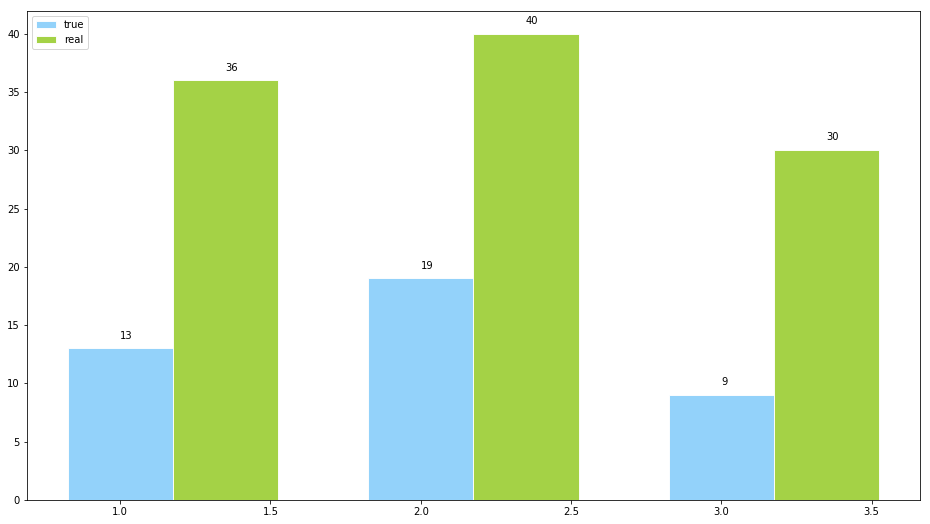

In [13]:
plt.figure(figsize=(16,9))
n = 3
X = np.arange(n)+1 #X是1,2,3柱的个数
Y1 = (a,b,c) # a = all b = 0.75 c = half
Y2 = (a_data,b_data,c_data)
plt.bar(X, Y1, alpha=0.9, width = 0.35, facecolor = 'lightskyblue', edgecolor = 'white', label='true', lw=1)
plt.bar(X+0.35, Y2, alpha=0.9, width = 0.35, facecolor = 'yellowgreen', edgecolor = 'white', label='real', lw=1)
i = 0
for y in Y1:
    plt.annotate("%s" % y, xy=(X[i],y), xytext=(0, 10), textcoords='offset points')
    i +=1
i = 0    
for y in Y2:
    plt.annotate("%s" % y, xy=(X[i]+0.35,y), xytext=(0, 10), textcoords='offset points')
    i +=1
plt.legend(loc="upper left") # label的位置在左上

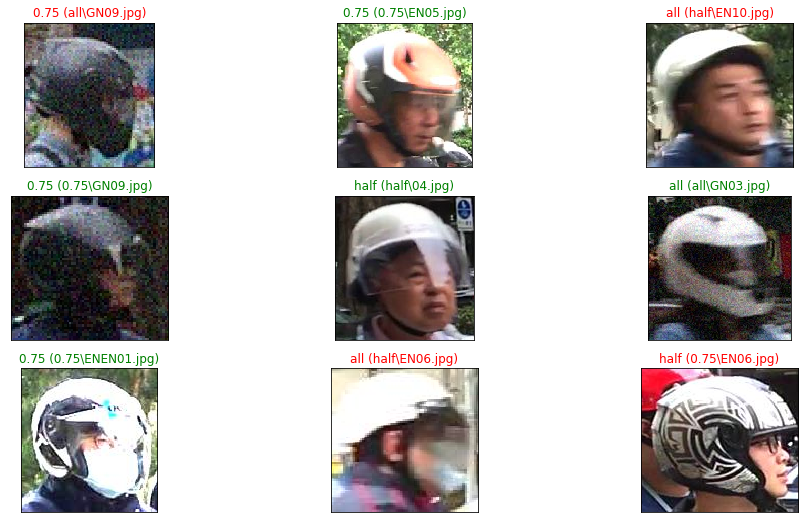

In [14]:
fig = plt.figure(figsize=(16,9))
for i, idx in enumerate(np.random.choice(range(0,len(filenames)), size=9, replace=False)):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    img = Image.open("D:/python-homework/final/test_model_picture/"+filenames[idx].replace("\\","/"))
    ax.imshow(img)
    n = filenames[idx].find("\\")
    ax.set_title("{} ({})".format(predictions[idx], filenames[idx]),
                 color=("green" if predictions[idx] == filenames[idx][:n] else "red"))

In [42]:

#照片放大
#訓練深度加深

# dimensions of our images.
img_width, img_height = 128,128
train_data_dir = 'D:/python-homework/final/test_model_picture_2'
validation_data_dir = 'D:/python-homework/final/test_model_picture_2'


model_2 = Sequential()
f_1=Conv2D(32,(5,5), padding='same',activation='relu')
pool_1 = MaxPool2D(pool_size=(2, 2))
f_2=Conv2D(64,(5,5), padding='same',activation='relu')
pool_2 = MaxPool2D(pool_size=(2, 2))
f_3=Conv2D(128,(5,5), padding='same',activation='relu')
pool_3 = MaxPool2D(pool_size=(2, 2))
f_4=Conv2D(256,(5,5), padding='same',activation='relu')
pool_4 = MaxPool2D(pool_size=(2, 2))
f_5=Conv2D(128,(5,5), padding='same',activation='relu')
pool_5 = MaxPool2D(pool_size=(2, 2))
f_6=Conv2D(64,(5,5), padding='same',activation='relu')
pool_6 = MaxPool2D(pool_size=(2, 2))
f_7=Conv2D(32,(5,5), padding='same',activation='relu')
pool_7 = MaxPool2D(pool_size=(2, 2))
f_8_1 = Dense(32,activation = 'relu')
f_8=Dense(3,activation='sigmoid')

x=Input(shape=(img_width, img_height, 3))
h_1=pool_1(f_1(x))
h_2=pool_2(f_2(h_1))
h_3=pool_3(f_3(h_2))
h_4=pool_4(f_4(h_3))
h_5=pool_5(f_5(h_4))
h_6=pool_6(f_6(h_5))

h_7=Flatten()(pool_7(f_7(h_6)))
h_8_1=Dropout(0.4)(f_8_1(h_7))
y = (f_8(h_8_1))


In [43]:
model_2 = Model(x,y)
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 128, 128, 32)      2432      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 64, 64, 64)        51264     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 128)       204928    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 128)       0         
__________

In [44]:
model_2.compile(loss='mse',optimizer=SGD(lr=0.07),metrics=['accuracy'])


train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,
                                   horizontal_flip=True,width_shift_range=0.2,
                                   height_shift_range=0.2,fill_mode='nearest' )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=1,
        class_mode='categorical')

train_labels = (train_generator.class_indices)

test_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=1,
        class_mode='categorical')
test_labels = (test_generator.class_indices)

Found 20440 images belonging to 3 classes.
Found 20440 images belonging to 3 classes.


In [18]:
model_2.fit_generator(
        train_generator,
        steps_per_epoch=1000,epochs=30,
        validation_data=test_generator,
        validation_steps=50)

Epoch 1/30
1000/1000 [==============================] - 78s 78ms/step - loss: 0.2262 - acc: 0.3710 - val_loss: 0.2235 - val_acc: 0.4000
Epoch 2/30
1000/1000 [==============================] - 79s 79ms/step - loss: 0.2226 - acc: 0.3620 - val_loss: 0.2211 - val_acc: 0.3600
Epoch 3/30
1000/1000 [==============================] - 78s 78ms/step - loss: 0.2224 - acc: 0.3630 - val_loss: 0.2260 - val_acc: 0.200023 - a - ETA: 3s - loss: 0.2223 - ac - ETA: 
Epoch 4/30
1000/1000 [==============================] - 77s 77ms/step - loss: 0.2232 - acc: 0.3450 - val_loss: 0.2231 - val_acc: 0.3200 
Epoch 5/30
1000/1000 [==============================] - 79s 79ms/step - loss: 0.2219 - acc: 0.3530 - val_loss: 0.2231 - val_acc: 0.32005s - loss: 0.2217 - - ETA: 4s - loss: 0.2217 - acc:  - ETA: 1s - loss: 0.2218
Epoch 6/30
1000/1000 [==============================] - 79s 79ms/step - loss: 0.2223 - acc: 0.3160 - val_loss: 0.2266 - val_acc: 0.2200: 5s - loss - - ETA: 0s - loss: 0.2223 - acc: 0.3
Epoch 7/30
10

In [45]:
filenames = test_generator.filenames
predict = model_2.predict_generator(test_generator,len(filenames))

In [46]:
a = 0
a_data = 0
b = 0
b_data = 0
c = 0
c_data = 0
all_data =[]
predicted_class_indices = np.argmax(predict, axis=1)
labels = (train_generator.class_indices)
label = dict((v,k) for k,v in labels.items())

# 建立代码标签与真实标签的关系
predictions = [label[i] for i in predicted_class_indices]

#建立预测结果和文件名之间的关系
for idx in range(len(filenames )):
    all_data.append([predictions[idx],filenames[idx]])
    print('predict  %s' % (predictions[idx]))
    n = filenames[idx].find("\\")
    print('title    %s' % filenames[idx])
    if(filenames[idx][:n] == "all"):
        a_data +=1
        if(filenames[idx][:n] == predictions[idx]):
            a+=1
    elif(filenames[idx][:n] == "0.75"):
        b_data +=1
        if(filenames[idx][:n] == predictions[idx]):
            b +=1
    elif(filenames[idx][:n] == "half"):
        c_data +=1
        if(filenames[idx][:n] == predictions[idx]):
            c +=1
    print('')

predict  0.75
title    0.75\3_400001.jpg

predict  0.75
title    0.75\3_400002.jpg

predict  0.75
title    0.75\3_400003.jpg

predict  0.75
title    0.75\3_400004.jpg

predict  0.75
title    0.75\3_400005.jpg

predict  0.75
title    0.75\3_400006.jpg

predict  0.75
title    0.75\3_400007.jpg

predict  0.75
title    0.75\3_400008.jpg

predict  0.75
title    0.75\3_400009.jpg

predict  0.75
title    0.75\3_400010.jpg

predict  0.75
title    0.75\3_400011.jpg

predict  0.75
title    0.75\3_400012.jpg

predict  0.75
title    0.75\3_400013.jpg

predict  0.75
title    0.75\3_400014.jpg

predict  0.75
title    0.75\3_400015.jpg

predict  0.75
title    0.75\3_400016.jpg

predict  0.75
title    0.75\3_400017.jpg

predict  0.75
title    0.75\3_400018.jpg

predict  0.75
title    0.75\3_400019.jpg

predict  0.75
title    0.75\3_400020.jpg

predict  0.75
title    0.75\3_400021.jpg

predict  0.75
title    0.75\3_400022.jpg

predict  0.75
title    0.75\3_400023.jpg

predict  0.75
title    0.75\3_4000


predict  0.75
title    0.75\ENGNEN3_400024.jpg

predict  0.75
title    0.75\ENGNEN3_400025.jpg

predict  0.75
title    0.75\ENGNEN3_400028.jpg

predict  0.75
title    0.75\ENGNEN3_400029.jpg

predict  0.75
title    0.75\ENGNEN3_400030.jpg

predict  0.75
title    0.75\ENGNEN3_400036.jpg

predict  0.75
title    0.75\ENGNEN3_400042.jpg

predict  0.75
title    0.75\ENGNEN3_400044.jpg

predict  0.75
title    0.75\ENGNEN3_400047.jpg

predict  0.75
title    0.75\ENGNEN3_400048.jpg

predict  0.75
title    0.75\ENGNEN3_400049.jpg

predict  0.75
title    0.75\ENGNEN3_400051.jpg

predict  0.75
title    0.75\ENGNEN3_400052.jpg

predict  0.75
title    0.75\ENGNEN3_400054.jpg

predict  0.75
title    0.75\ENGNEN3_400056.jpg

predict  0.75
title    0.75\ENGNEN3_400058.jpg

predict  0.75
title    0.75\ENGNEN3_400060.jpg

predict  0.75
title    0.75\ENGNEN3_400061.jpg

predict  0.75
title    0.75\ENGNEN3_400062.jpg

predict  0.75
title    0.75\ENGNEN3_400064.jpg

predict  0.75
title    0.75\ENGNEN3_400

title    0.75\ENGNequvequv3_400044.jpg

predict  0.75
title    0.75\ENGNequvequv3_400047.jpg

predict  0.75
title    0.75\ENGNequvequv3_400048.jpg

predict  0.75
title    0.75\ENGNequvequv3_400049.jpg

predict  0.75
title    0.75\ENGNequvequv3_400051.jpg

predict  0.75
title    0.75\ENGNequvequv3_400052.jpg

predict  0.75
title    0.75\ENGNequvequv3_400054.jpg

predict  0.75
title    0.75\ENGNequvequv3_400056.jpg

predict  0.75
title    0.75\ENGNequvequv3_400058.jpg

predict  0.75
title    0.75\ENGNequvequv3_400060.jpg

predict  0.75
title    0.75\ENGNequvequv3_400061.jpg

predict  0.75
title    0.75\ENGNequvequv3_400062.jpg

predict  0.75
title    0.75\ENGNequvequv3_400064.jpg

predict  0.75
title    0.75\ENGNequvequv3_400068.jpg

predict  0.75
title    0.75\ENGNequvequv3_400071.jpg

predict  0.75
title    0.75\ENGNequvequv3_400077.jpg

predict  0.75
title    0.75\ENGNequvequv3_400080.jpg

predict  0.75
title    0.75\ENGNequvequv3_400084.jpg

predict  0.75
title    0.75\ENGNequvequv3_

predict  0.75
title    0.75\ENequvequvEN3_400049.jpg

predict  0.75
title    0.75\ENequvequvEN3_400051.jpg

predict  0.75
title    0.75\ENequvequvEN3_400052.jpg

predict  0.75
title    0.75\ENequvequvEN3_400054.jpg

predict  0.75
title    0.75\ENequvequvEN3_400056.jpg

predict  0.75
title    0.75\ENequvequvEN3_400058.jpg

predict  0.75
title    0.75\ENequvequvEN3_400060.jpg

predict  0.75
title    0.75\ENequvequvEN3_400061.jpg

predict  0.75
title    0.75\ENequvequvEN3_400062.jpg

predict  0.75
title    0.75\ENequvequvEN3_400064.jpg

predict  0.75
title    0.75\ENequvequvEN3_400068.jpg

predict  0.75
title    0.75\ENequvequvEN3_400071.jpg

predict  0.75
title    0.75\ENequvequvEN3_400077.jpg

predict  0.75
title    0.75\ENequvequvEN3_400080.jpg

predict  0.75
title    0.75\ENequvequvEN3_400084.jpg

predict  0.75
title    0.75\ENequvequvEN3_400089.jpg

predict  0.75
title    0.75\ENequvequvEN3_400095.jpg

predict  0.75
title    0.75\ENequvequvEN3_400096.jpg

predict  0.75
title    0.75\


predict  0.75
title    0.75\ENrotequv3_400058.jpg

predict  0.75
title    0.75\ENrotequv3_400060.jpg

predict  0.75
title    0.75\ENrotequv3_400061.jpg

predict  0.75
title    0.75\ENrotequv3_400062.jpg

predict  0.75
title    0.75\ENrotequv3_400064.jpg

predict  0.75
title    0.75\ENrotequv3_400068.jpg

predict  0.75
title    0.75\ENrotequv3_400071.jpg

predict  0.75
title    0.75\ENrotequv3_400077.jpg

predict  0.75
title    0.75\ENrotequv3_400080.jpg

predict  0.75
title    0.75\ENrotequv3_400084.jpg

predict  0.75
title    0.75\ENrotequv3_400089.jpg

predict  0.75
title    0.75\ENrotequv3_400095.jpg

predict  0.75
title    0.75\ENrotequv3_400096.jpg

predict  0.75
title    0.75\ENrotequvEN3_400003.jpg

predict  0.75
title    0.75\ENrotequvEN3_400005.jpg

predict  0.75
title    0.75\ENrotequvEN3_400009.jpg

predict  0.75
title    0.75\ENrotequvEN3_400016.jpg

predict  0.75
title    0.75\ENrotequvEN3_400019.jpg

predict  0.75
title    0.75\ENrotequvEN3_400024.jpg

predict  0.75
titl


predict  0.75
title    0.75\GNENequv3_400024.jpg

predict  0.75
title    0.75\GNENequv3_400025.jpg

predict  0.75
title    0.75\GNENequv3_400028.jpg

predict  0.75
title    0.75\GNENequv3_400029.jpg

predict  0.75
title    0.75\GNENequv3_400030.jpg

predict  0.75
title    0.75\GNENequv3_400036.jpg

predict  0.75
title    0.75\GNENequv3_400042.jpg

predict  0.75
title    0.75\GNENequv3_400044.jpg

predict  0.75
title    0.75\GNENequv3_400047.jpg

predict  0.75
title    0.75\GNENequv3_400048.jpg

predict  0.75
title    0.75\GNENequv3_400049.jpg

predict  0.75
title    0.75\GNENequv3_400051.jpg

predict  0.75
title    0.75\GNENequv3_400052.jpg

predict  0.75
title    0.75\GNENequv3_400054.jpg

predict  0.75
title    0.75\GNENequv3_400056.jpg

predict  0.75
title    0.75\GNENequv3_400058.jpg

predict  0.75
title    0.75\GNENequv3_400060.jpg

predict  0.75
title    0.75\GNENequv3_400061.jpg

predict  0.75
title    0.75\GNENequv3_400062.jpg

predict  0.75
title    0.75\GNENequv3_400064.jpg


predict  0.75
title    0.75\GNGNequv3_400051.jpg

predict  0.75
title    0.75\GNGNequv3_400052.jpg

predict  0.75
title    0.75\GNGNequv3_400054.jpg

predict  0.75
title    0.75\GNGNequv3_400056.jpg

predict  0.75
title    0.75\GNGNequv3_400058.jpg

predict  0.75
title    0.75\GNGNequv3_400060.jpg

predict  0.75
title    0.75\GNGNequv3_400061.jpg

predict  0.75
title    0.75\GNGNequv3_400062.jpg

predict  0.75
title    0.75\GNGNequv3_400064.jpg

predict  0.75
title    0.75\GNGNequv3_400068.jpg

predict  0.75
title    0.75\GNGNequv3_400071.jpg

predict  0.75
title    0.75\GNGNequv3_400077.jpg

predict  0.75
title    0.75\GNGNequv3_400080.jpg

predict  0.75
title    0.75\GNGNequv3_400084.jpg

predict  0.75
title    0.75\GNGNequv3_400089.jpg

predict  0.75
title    0.75\GNGNequv3_400095.jpg

predict  0.75
title    0.75\GNGNequv3_400096.jpg

predict  0.75
title    0.75\GNGNequvEN3_400003.jpg

predict  0.75
title    0.75\GNGNequvEN3_400005.jpg

predict  0.75
title    0.75\GNGNequvEN3_400009

predict  0.75
title    0.75\GNequvequvGN3_400036.jpg

predict  0.75
title    0.75\GNequvequvGN3_400042.jpg

predict  0.75
title    0.75\GNequvequvGN3_400044.jpg

predict  0.75
title    0.75\GNequvequvGN3_400047.jpg

predict  0.75
title    0.75\GNequvequvGN3_400048.jpg

predict  0.75
title    0.75\GNequvequvGN3_400049.jpg

predict  0.75
title    0.75\GNequvequvGN3_400051.jpg

predict  0.75
title    0.75\GNequvequvGN3_400052.jpg

predict  0.75
title    0.75\GNequvequvGN3_400054.jpg

predict  0.75
title    0.75\GNequvequvGN3_400056.jpg

predict  0.75
title    0.75\GNequvequvGN3_400058.jpg

predict  0.75
title    0.75\GNequvequvGN3_400060.jpg

predict  0.75
title    0.75\GNequvequvGN3_400061.jpg

predict  0.75
title    0.75\GNequvequvGN3_400062.jpg

predict  0.75
title    0.75\GNequvequvGN3_400064.jpg

predict  0.75
title    0.75\GNequvequvGN3_400068.jpg

predict  0.75
title    0.75\GNequvequvGN3_400071.jpg

predict  0.75
title    0.75\GNequvequvGN3_400077.jpg

predict  0.75
title    0.75\

title    0.75\GNrotequv3_400036.jpg

predict  0.75
title    0.75\GNrotequv3_400042.jpg

predict  0.75
title    0.75\GNrotequv3_400044.jpg

predict  0.75
title    0.75\GNrotequv3_400047.jpg

predict  0.75
title    0.75\GNrotequv3_400048.jpg

predict  0.75
title    0.75\GNrotequv3_400049.jpg

predict  0.75
title    0.75\GNrotequv3_400051.jpg

predict  0.75
title    0.75\GNrotequv3_400052.jpg

predict  0.75
title    0.75\GNrotequv3_400054.jpg

predict  0.75
title    0.75\GNrotequv3_400056.jpg

predict  0.75
title    0.75\GNrotequv3_400058.jpg

predict  0.75
title    0.75\GNrotequv3_400060.jpg

predict  0.75
title    0.75\GNrotequv3_400061.jpg

predict  0.75
title    0.75\GNrotequv3_400062.jpg

predict  0.75
title    0.75\GNrotequv3_400064.jpg

predict  0.75
title    0.75\GNrotequv3_400068.jpg

predict  0.75
title    0.75\GNrotequv3_400071.jpg

predict  0.75
title    0.75\GNrotequv3_400077.jpg

predict  0.75
title    0.75\GNrotequv3_400080.jpg

predict  0.75
title    0.75\GNrotequv3_400084


predict  0.75
title    0.75\equvENGN3_400028.jpg

predict  0.75
title    0.75\equvENGN3_400029.jpg

predict  0.75
title    0.75\equvENGN3_400030.jpg

predict  0.75
title    0.75\equvENGN3_400036.jpg

predict  0.75
title    0.75\equvENGN3_400042.jpg

predict  0.75
title    0.75\equvENGN3_400044.jpg

predict  0.75
title    0.75\equvENGN3_400047.jpg

predict  0.75
title    0.75\equvENGN3_400048.jpg

predict  0.75
title    0.75\equvENGN3_400049.jpg

predict  0.75
title    0.75\equvENGN3_400051.jpg

predict  0.75
title    0.75\equvENGN3_400052.jpg

predict  0.75
title    0.75\equvENGN3_400054.jpg

predict  0.75
title    0.75\equvENGN3_400056.jpg

predict  0.75
title    0.75\equvENGN3_400058.jpg

predict  0.75
title    0.75\equvENGN3_400060.jpg

predict  0.75
title    0.75\equvENGN3_400061.jpg

predict  0.75
title    0.75\equvENGN3_400062.jpg

predict  0.75
title    0.75\equvENGN3_400064.jpg

predict  0.75
title    0.75\equvENGN3_400068.jpg

predict  0.75
title    0.75\equvENGN3_400071.jpg


predict  0.75
title    0.75\equvGNENequv3_400061.jpg

predict  0.75
title    0.75\equvGNENequv3_400062.jpg

predict  0.75
title    0.75\equvGNENequv3_400064.jpg

predict  0.75
title    0.75\equvGNENequv3_400068.jpg

predict  0.75
title    0.75\equvGNENequv3_400071.jpg

predict  0.75
title    0.75\equvGNENequv3_400077.jpg

predict  0.75
title    0.75\equvGNENequv3_400080.jpg

predict  0.75
title    0.75\equvGNENequv3_400084.jpg

predict  0.75
title    0.75\equvGNENequv3_400089.jpg

predict  0.75
title    0.75\equvGNENequv3_400095.jpg

predict  0.75
title    0.75\equvGNENequv3_400096.jpg

predict  0.75
title    0.75\equvGNGN3_400003.jpg

predict  0.75
title    0.75\equvGNGN3_400005.jpg

predict  0.75
title    0.75\equvGNGN3_400009.jpg

predict  0.75
title    0.75\equvGNGN3_400016.jpg

predict  0.75
title    0.75\equvGNGN3_400019.jpg

predict  0.75
title    0.75\equvGNGN3_400024.jpg

predict  0.75
title    0.75\equvGNGN3_400025.jpg

predict  0.75
title    0.75\equvGNGN3_400028.jpg

predic


predict  0.75
title    0.75\equvequvENGN3_400062.jpg

predict  0.75
title    0.75\equvequvENGN3_400064.jpg

predict  0.75
title    0.75\equvequvENGN3_400068.jpg

predict  0.75
title    0.75\equvequvENGN3_400071.jpg

predict  0.75
title    0.75\equvequvENGN3_400077.jpg

predict  0.75
title    0.75\equvequvENGN3_400080.jpg

predict  0.75
title    0.75\equvequvENGN3_400084.jpg

predict  0.75
title    0.75\equvequvENGN3_400089.jpg

predict  0.75
title    0.75\equvequvENGN3_400095.jpg

predict  0.75
title    0.75\equvequvENGN3_400096.jpg

predict  0.75
title    0.75\equvequvENequv3_400003.jpg

predict  0.75
title    0.75\equvequvENequv3_400005.jpg

predict  0.75
title    0.75\equvequvENequv3_400009.jpg

predict  0.75
title    0.75\equvequvENequv3_400016.jpg

predict  0.75
title    0.75\equvequvENequv3_400019.jpg

predict  0.75
title    0.75\equvequvENequv3_400024.jpg

predict  0.75
title    0.75\equvequvENequv3_400025.jpg

predict  0.75
title    0.75\equvequvENequv3_400028.jpg

predict  0.

predict  0.75
title    0.75\equvrot3_400096.jpg

predict  0.75
title    0.75\equvrotEN3_400003.jpg

predict  0.75
title    0.75\equvrotEN3_400005.jpg

predict  0.75
title    0.75\equvrotEN3_400009.jpg

predict  0.75
title    0.75\equvrotEN3_400016.jpg

predict  0.75
title    0.75\equvrotEN3_400019.jpg

predict  0.75
title    0.75\equvrotEN3_400024.jpg

predict  0.75
title    0.75\equvrotEN3_400025.jpg

predict  0.75
title    0.75\equvrotEN3_400028.jpg

predict  0.75
title    0.75\equvrotEN3_400029.jpg

predict  0.75
title    0.75\equvrotEN3_400030.jpg

predict  0.75
title    0.75\equvrotEN3_400036.jpg

predict  0.75
title    0.75\equvrotEN3_400042.jpg

predict  0.75
title    0.75\equvrotEN3_400044.jpg

predict  0.75
title    0.75\equvrotEN3_400047.jpg

predict  0.75
title    0.75\equvrotEN3_400048.jpg

predict  0.75
title    0.75\equvrotEN3_400049.jpg

predict  0.75
title    0.75\equvrotEN3_400051.jpg

predict  0.75
title    0.75\equvrotEN3_400052.jpg

predict  0.75
title    0.75\equvr

title    0.75\rotENENGN3_400095.jpg

predict  0.75
title    0.75\rotENENGN3_400096.jpg

predict  0.75
title    0.75\rotENENequv3_400003.jpg

predict  0.75
title    0.75\rotENENequv3_400005.jpg

predict  0.75
title    0.75\rotENENequv3_400009.jpg

predict  0.75
title    0.75\rotENENequv3_400016.jpg

predict  0.75
title    0.75\rotENENequv3_400019.jpg

predict  0.75
title    0.75\rotENENequv3_400024.jpg

predict  0.75
title    0.75\rotENENequv3_400025.jpg

predict  0.75
title    0.75\rotENENequv3_400028.jpg

predict  0.75
title    0.75\rotENENequv3_400029.jpg

predict  0.75
title    0.75\rotENENequv3_400030.jpg

predict  0.75
title    0.75\rotENENequv3_400036.jpg

predict  0.75
title    0.75\rotENENequv3_400042.jpg

predict  0.75
title    0.75\rotENENequv3_400044.jpg

predict  0.75
title    0.75\rotENENequv3_400047.jpg

predict  0.75
title    0.75\rotENENequv3_400048.jpg

predict  0.75
title    0.75\rotENENequv3_400049.jpg

predict  0.75
title    0.75\rotENENequv3_400051.jpg

predict  0.

title    0.75\rotGNEN3_400077.jpg

predict  0.75
title    0.75\rotGNEN3_400080.jpg

predict  0.75
title    0.75\rotGNEN3_400084.jpg

predict  0.75
title    0.75\rotGNEN3_400089.jpg

predict  0.75
title    0.75\rotGNEN3_400095.jpg

predict  0.75
title    0.75\rotGNEN3_400096.jpg

predict  0.75
title    0.75\rotGNENEN3_400003.jpg

predict  0.75
title    0.75\rotGNENEN3_400005.jpg

predict  0.75
title    0.75\rotGNENEN3_400009.jpg

predict  0.75
title    0.75\rotGNENEN3_400016.jpg

predict  0.75
title    0.75\rotGNENEN3_400019.jpg

predict  0.75
title    0.75\rotGNENEN3_400024.jpg

predict  0.75
title    0.75\rotGNENEN3_400025.jpg

predict  0.75
title    0.75\rotGNENEN3_400028.jpg

predict  0.75
title    0.75\rotGNENEN3_400029.jpg

predict  0.75
title    0.75\rotGNENEN3_400030.jpg

predict  0.75
title    0.75\rotGNENEN3_400036.jpg

predict  0.75
title    0.75\rotGNENEN3_400042.jpg

predict  0.75
title    0.75\rotGNENEN3_400044.jpg

predict  0.75
title    0.75\rotGNENEN3_400047.jpg

predic

predict  0.75
title    0.75\rotequvENEN3_400024.jpg

predict  0.75
title    0.75\rotequvENEN3_400025.jpg

predict  0.75
title    0.75\rotequvENEN3_400028.jpg

predict  0.75
title    0.75\rotequvENEN3_400029.jpg

predict  0.75
title    0.75\rotequvENEN3_400030.jpg

predict  0.75
title    0.75\rotequvENEN3_400036.jpg

predict  0.75
title    0.75\rotequvENEN3_400042.jpg

predict  0.75
title    0.75\rotequvENEN3_400044.jpg

predict  0.75
title    0.75\rotequvENEN3_400047.jpg

predict  0.75
title    0.75\rotequvENEN3_400048.jpg

predict  0.75
title    0.75\rotequvENEN3_400049.jpg

predict  0.75
title    0.75\rotequvENEN3_400051.jpg

predict  0.75
title    0.75\rotequvENEN3_400052.jpg

predict  0.75
title    0.75\rotequvENEN3_400054.jpg

predict  0.75
title    0.75\rotequvENEN3_400056.jpg

predict  0.75
title    0.75\rotequvENEN3_400058.jpg

predict  0.75
title    0.75\rotequvENEN3_400060.jpg

predict  0.75
title    0.75\rotequvENEN3_400061.jpg

predict  0.75
title    0.75\rotequvENEN3_40006


predict  0.75
title    0.75\rotrotENEN3_400003.jpg

predict  0.75
title    0.75\rotrotENEN3_400005.jpg

predict  0.75
title    0.75\rotrotENEN3_400009.jpg

predict  0.75
title    0.75\rotrotENEN3_400016.jpg

predict  0.75
title    0.75\rotrotENEN3_400019.jpg

predict  0.75
title    0.75\rotrotENEN3_400024.jpg

predict  0.75
title    0.75\rotrotENEN3_400025.jpg

predict  0.75
title    0.75\rotrotENEN3_400028.jpg

predict  0.75
title    0.75\rotrotENEN3_400029.jpg

predict  0.75
title    0.75\rotrotENEN3_400030.jpg

predict  0.75
title    0.75\rotrotENEN3_400036.jpg

predict  0.75
title    0.75\rotrotENEN3_400042.jpg

predict  0.75
title    0.75\rotrotENEN3_400044.jpg

predict  0.75
title    0.75\rotrotENEN3_400047.jpg

predict  0.75
title    0.75\rotrotENEN3_400048.jpg

predict  0.75
title    0.75\rotrotENEN3_400049.jpg

predict  0.75
title    0.75\rotrotENEN3_400051.jpg

predict  0.75
title    0.75\rotrotENEN3_400052.jpg

predict  0.75
title    0.75\rotrotENEN3_400054.jpg

predict  0.


predict  0.75
title    0.75\rotrotequvequv3_400044.jpg

predict  0.75
title    0.75\rotrotequvequv3_400047.jpg

predict  0.75
title    0.75\rotrotequvequv3_400048.jpg

predict  0.75
title    0.75\rotrotequvequv3_400049.jpg

predict  0.75
title    0.75\rotrotequvequv3_400051.jpg

predict  0.75
title    0.75\rotrotequvequv3_400052.jpg

predict  0.75
title    0.75\rotrotequvequv3_400054.jpg

predict  0.75
title    0.75\rotrotequvequv3_400056.jpg

predict  0.75
title    0.75\rotrotequvequv3_400058.jpg

predict  0.75
title    0.75\rotrotequvequv3_400060.jpg

predict  0.75
title    0.75\rotrotequvequv3_400061.jpg

predict  0.75
title    0.75\rotrotequvequv3_400062.jpg

predict  0.75
title    0.75\rotrotequvequv3_400064.jpg

predict  0.75
title    0.75\rotrotequvequv3_400068.jpg

predict  0.75
title    0.75\rotrotequvequv3_400071.jpg

predict  0.75
title    0.75\rotrotequvequv3_400077.jpg

predict  0.75
title    0.75\rotrotequvequv3_400080.jpg

predict  0.75
title    0.75\rotrotequvequv3_400

title    all\ENGNENall00041.jpg

predict  0.75
title    all\ENGNENall00046.jpg

predict  0.75
title    all\ENGNENall00056.jpg

predict  0.75
title    all\ENGNENall00061.jpg

predict  0.75
title    all\ENGNENall00062.jpg

predict  0.75
title    all\ENGNENall00066.jpg

predict  0.75
title    all\ENGNENall00067.jpg

predict  0.75
title    all\ENGNENall00068.jpg

predict  0.75
title    all\ENGNENall00071.jpg

predict  0.75
title    all\ENGNENall00072.jpg

predict  0.75
title    all\ENGNENall00079.jpg

predict  0.75
title    all\ENGNENall00085.jpg

predict  0.75
title    all\ENGNENall00086.jpg

predict  0.75
title    all\ENGNENall00089.jpg

predict  0.75
title    all\ENGNENall00090.jpg

predict  0.75
title    all\ENGNENall00092.jpg

predict  0.75
title    all\ENGNENall00093.jpg

predict  0.75
title    all\ENGNENall00096.jpg

predict  0.75
title    all\ENGNENequvall00004.jpg

predict  0.75
title    all\ENGNENequvall00005.jpg

predict  0.75
title    all\ENGNENequvall00014.jpg

predict  0.75
t

title    all\ENequvGNENall00061.jpg

predict  0.75
title    all\ENequvGNENall00062.jpg

predict  0.75
title    all\ENequvGNENall00066.jpg

predict  0.75
title    all\ENequvGNENall00067.jpg

predict  0.75
title    all\ENequvGNENall00068.jpg

predict  0.75
title    all\ENequvGNENall00071.jpg

predict  0.75
title    all\ENequvGNENall00072.jpg

predict  0.75
title    all\ENequvGNENall00079.jpg

predict  0.75
title    all\ENequvGNENall00085.jpg

predict  0.75
title    all\ENequvGNENall00086.jpg

predict  0.75
title    all\ENequvGNENall00089.jpg

predict  0.75
title    all\ENequvGNENall00090.jpg

predict  0.75
title    all\ENequvGNENall00092.jpg

predict  0.75
title    all\ENequvGNENall00093.jpg

predict  0.75
title    all\ENequvGNENall00096.jpg

predict  0.75
title    all\ENequvGNGNall00004.jpg

predict  0.75
title    all\ENequvGNGNall00005.jpg

predict  0.75
title    all\ENequvGNGNall00014.jpg

predict  0.75
title    all\ENequvGNGNall00018.jpg

predict  0.75
title    all\ENequvGNGNall00019

title    all\ENrotGNENall00025.jpg

predict  0.75
title    all\ENrotGNENall00028.jpg

predict  0.75
title    all\ENrotGNENall00032.jpg

predict  0.75
title    all\ENrotGNENall00040.jpg

predict  0.75
title    all\ENrotGNENall00041.jpg

predict  0.75
title    all\ENrotGNENall00046.jpg

predict  0.75
title    all\ENrotGNENall00056.jpg

predict  0.75
title    all\ENrotGNENall00061.jpg

predict  0.75
title    all\ENrotGNENall00062.jpg

predict  0.75
title    all\ENrotGNENall00066.jpg

predict  0.75
title    all\ENrotGNENall00067.jpg

predict  0.75
title    all\ENrotGNENall00068.jpg

predict  0.75
title    all\ENrotGNENall00071.jpg

predict  0.75
title    all\ENrotGNENall00072.jpg

predict  0.75
title    all\ENrotGNENall00079.jpg

predict  0.75
title    all\ENrotGNENall00085.jpg

predict  0.75
title    all\ENrotGNENall00086.jpg

predict  0.75
title    all\ENrotGNENall00089.jpg

predict  0.75
title    all\ENrotGNENall00090.jpg

predict  0.75
title    all\ENrotGNENall00092.jpg

predict  0.75


predict  0.75
title    all\GNENENall00096.jpg

predict  0.75
title    all\GNENENequvall00004.jpg

predict  0.75
title    all\GNENENequvall00005.jpg

predict  0.75
title    all\GNENENequvall00014.jpg

predict  0.75
title    all\GNENENequvall00018.jpg

predict  0.75
title    all\GNENENequvall00019.jpg

predict  0.75
title    all\GNENENequvall00023.jpg

predict  0.75
title    all\GNENENequvall00024.jpg

predict  0.75
title    all\GNENENequvall00025.jpg

predict  0.75
title    all\GNENENequvall00028.jpg

predict  0.75
title    all\GNENENequvall00032.jpg

predict  0.75
title    all\GNENENequvall00040.jpg

predict  0.75
title    all\GNENENequvall00041.jpg

predict  0.75
title    all\GNENENequvall00046.jpg

predict  0.75
title    all\GNENENequvall00056.jpg

predict  0.75
title    all\GNENENequvall00061.jpg

predict  0.75
title    all\GNENENequvall00062.jpg

predict  0.75
title    all\GNENENequvall00066.jpg

predict  0.75
title    all\GNENENequvall00067.jpg

predict  0.75
title    all\GNENENeq


predict  0.75
title    all\GNGNENGNall00062.jpg

predict  0.75
title    all\GNGNENGNall00066.jpg

predict  0.75
title    all\GNGNENGNall00067.jpg

predict  0.75
title    all\GNGNENGNall00068.jpg

predict  0.75
title    all\GNGNENGNall00071.jpg

predict  0.75
title    all\GNGNENGNall00072.jpg

predict  0.75
title    all\GNGNENGNall00079.jpg

predict  0.75
title    all\GNGNENGNall00085.jpg

predict  0.75
title    all\GNGNENGNall00086.jpg

predict  0.75
title    all\GNGNENGNall00089.jpg

predict  0.75
title    all\GNGNENGNall00090.jpg

predict  0.75
title    all\GNGNENGNall00092.jpg

predict  0.75
title    all\GNGNENGNall00093.jpg

predict  0.75
title    all\GNGNENGNall00096.jpg

predict  0.75
title    all\GNGNENall00004.jpg

predict  0.75
title    all\GNGNENall00005.jpg

predict  0.75
title    all\GNGNENall00014.jpg

predict  0.75
title    all\GNGNENall00018.jpg

predict  0.75
title    all\GNGNENall00019.jpg

predict  0.75
title    all\GNGNENall00023.jpg

predict  0.75
title    all\GNGN

predict  0.75
title    all\GNequvENENall00014.jpg

predict  0.75
title    all\GNequvENENall00018.jpg

predict  0.75
title    all\GNequvENENall00019.jpg

predict  0.75
title    all\GNequvENENall00023.jpg

predict  0.75
title    all\GNequvENENall00024.jpg

predict  0.75
title    all\GNequvENENall00025.jpg

predict  0.75
title    all\GNequvENENall00028.jpg

predict  0.75
title    all\GNequvENENall00032.jpg

predict  0.75
title    all\GNequvENENall00040.jpg

predict  0.75
title    all\GNequvENENall00041.jpg

predict  0.75
title    all\GNequvENENall00046.jpg

predict  0.75
title    all\GNequvENENall00056.jpg

predict  0.75
title    all\GNequvENENall00061.jpg

predict  0.75
title    all\GNequvENENall00062.jpg

predict  0.75
title    all\GNequvENENall00066.jpg

predict  0.75
title    all\GNequvENENall00067.jpg

predict  0.75
title    all\GNequvENENall00068.jpg

predict  0.75
title    all\GNequvENENall00071.jpg

predict  0.75
title    all\GNequvENENall00072.jpg

predict  0.75
title    all\GNeq

predict  0.75
title    all\GNequvequvGNall00068.jpg

predict  0.75
title    all\GNequvequvGNall00071.jpg

predict  0.75
title    all\GNequvequvGNall00072.jpg

predict  0.75
title    all\GNequvequvGNall00079.jpg

predict  0.75
title    all\GNequvequvGNall00085.jpg

predict  0.75
title    all\GNequvequvGNall00086.jpg

predict  0.75
title    all\GNequvequvGNall00089.jpg

predict  0.75
title    all\GNequvequvGNall00090.jpg

predict  0.75
title    all\GNequvequvGNall00092.jpg

predict  0.75
title    all\GNequvequvGNall00093.jpg

predict  0.75
title    all\GNequvequvGNall00096.jpg

predict  0.75
title    all\GNequvequvall00004.jpg

predict  0.75
title    all\GNequvequvall00005.jpg

predict  0.75
title    all\GNequvequvall00014.jpg

predict  0.75
title    all\GNequvequvall00018.jpg

predict  0.75
title    all\GNequvequvall00019.jpg

predict  0.75
title    all\GNequvequvall00023.jpg

predict  0.75
title    all\GNequvequvall00024.jpg

predict  0.75
title    all\GNequvequvall00025.jpg

predict  

predict  0.75
title    all\GNrotall00085.jpg

predict  0.75
title    all\GNrotall00086.jpg

predict  0.75
title    all\GNrotall00089.jpg

predict  0.75
title    all\GNrotall00090.jpg

predict  0.75
title    all\GNrotall00092.jpg

predict  0.75
title    all\GNrotall00093.jpg

predict  0.75
title    all\GNrotall00096.jpg

predict  0.75
title    all\GNrotequvENall00004.jpg

predict  0.75
title    all\GNrotequvENall00005.jpg

predict  0.75
title    all\GNrotequvENall00014.jpg

predict  0.75
title    all\GNrotequvENall00018.jpg

predict  0.75
title    all\GNrotequvENall00019.jpg

predict  0.75
title    all\GNrotequvENall00023.jpg

predict  0.75
title    all\GNrotequvENall00024.jpg

predict  0.75
title    all\GNrotequvENall00025.jpg

predict  0.75
title    all\GNrotequvENall00028.jpg

predict  0.75
title    all\GNrotequvENall00032.jpg

predict  0.75
title    all\GNrotequvENall00040.jpg

predict  0.75
title    all\GNrotequvENall00041.jpg

predict  0.75
title    all\GNrotequvENall00046.jpg

pr

predict  0.75
title    all\equvENGNENall00040.jpg

predict  0.75
title    all\equvENGNENall00041.jpg

predict  0.75
title    all\equvENGNENall00046.jpg

predict  0.75
title    all\equvENGNENall00056.jpg

predict  0.75
title    all\equvENGNENall00061.jpg

predict  0.75
title    all\equvENGNENall00062.jpg

predict  0.75
title    all\equvENGNENall00066.jpg

predict  0.75
title    all\equvENGNENall00067.jpg

predict  0.75
title    all\equvENGNENall00068.jpg

predict  0.75
title    all\equvENGNENall00071.jpg

predict  0.75
title    all\equvENGNENall00072.jpg

predict  0.75
title    all\equvENGNENall00079.jpg

predict  0.75
title    all\equvENGNENall00085.jpg

predict  0.75
title    all\equvENGNENall00086.jpg

predict  0.75
title    all\equvENGNENall00089.jpg

predict  0.75
title    all\equvENGNENall00090.jpg

predict  0.75
title    all\equvENGNENall00092.jpg

predict  0.75
title    all\equvENGNENall00093.jpg

predict  0.75
title    all\equvENGNENall00096.jpg

predict  0.75
title    all\equv

predict  0.75
title    all\equvGNENall00061.jpg

predict  0.75
title    all\equvGNENall00062.jpg

predict  0.75
title    all\equvGNENall00066.jpg

predict  0.75
title    all\equvGNENall00067.jpg

predict  0.75
title    all\equvGNENall00068.jpg

predict  0.75
title    all\equvGNENall00071.jpg

predict  0.75
title    all\equvGNENall00072.jpg

predict  0.75
title    all\equvGNENall00079.jpg

predict  0.75
title    all\equvGNENall00085.jpg

predict  0.75
title    all\equvGNENall00086.jpg

predict  0.75
title    all\equvGNENall00089.jpg

predict  0.75
title    all\equvGNENall00090.jpg

predict  0.75
title    all\equvGNENall00092.jpg

predict  0.75
title    all\equvGNENall00093.jpg

predict  0.75
title    all\equvGNENall00096.jpg

predict  0.75
title    all\equvGNENequvall00004.jpg

predict  0.75
title    all\equvGNENequvall00005.jpg

predict  0.75
title    all\equvGNENequvall00014.jpg

predict  0.75
title    all\equvGNENequvall00018.jpg

predict  0.75
title    all\equvGNENequvall00019.jpg




predict  0.75
title    all\equvall00040.jpg

predict  0.75
title    all\equvall00041.jpg

predict  0.75
title    all\equvall00046.jpg

predict  0.75
title    all\equvall00056.jpg

predict  0.75
title    all\equvall00061.jpg

predict  0.75
title    all\equvall00062.jpg

predict  0.75
title    all\equvall00066.jpg

predict  0.75
title    all\equvall00067.jpg

predict  0.75
title    all\equvall00068.jpg

predict  0.75
title    all\equvall00071.jpg

predict  0.75
title    all\equvall00072.jpg

predict  0.75
title    all\equvall00079.jpg

predict  0.75
title    all\equvall00085.jpg

predict  0.75
title    all\equvall00086.jpg

predict  0.75
title    all\equvall00089.jpg

predict  0.75
title    all\equvall00090.jpg

predict  0.75
title    all\equvall00092.jpg

predict  0.75
title    all\equvall00093.jpg

predict  0.75
title    all\equvall00096.jpg

predict  0.75
title    all\equvequvENENall00004.jpg

predict  0.75
title    all\equvequvENENall00005.jpg

predict  0.75
title    all\equvequvENE

predict  0.75
title    all\equvrotGNENall00004.jpg

predict  0.75
title    all\equvrotGNENall00005.jpg

predict  0.75
title    all\equvrotGNENall00014.jpg

predict  0.75
title    all\equvrotGNENall00018.jpg

predict  0.75
title    all\equvrotGNENall00019.jpg

predict  0.75
title    all\equvrotGNENall00023.jpg

predict  0.75
title    all\equvrotGNENall00024.jpg

predict  0.75
title    all\equvrotGNENall00025.jpg

predict  0.75
title    all\equvrotGNENall00028.jpg

predict  0.75
title    all\equvrotGNENall00032.jpg

predict  0.75
title    all\equvrotGNENall00040.jpg

predict  0.75
title    all\equvrotGNENall00041.jpg

predict  0.75
title    all\equvrotGNENall00046.jpg

predict  0.75
title    all\equvrotGNENall00056.jpg

predict  0.75
title    all\equvrotGNENall00061.jpg

predict  0.75
title    all\equvrotGNENall00062.jpg

predict  0.75
title    all\equvrotGNENall00066.jpg

predict  0.75
title    all\equvrotGNENall00067.jpg

predict  0.75
title    all\equvrotGNENall00068.jpg

predict  0.7

predict  0.75
title    all\rotENENall00056.jpg

predict  0.75
title    all\rotENENall00061.jpg

predict  0.75
title    all\rotENENall00062.jpg

predict  0.75
title    all\rotENENall00066.jpg

predict  0.75
title    all\rotENENall00067.jpg

predict  0.75
title    all\rotENENall00068.jpg

predict  0.75
title    all\rotENENall00071.jpg

predict  0.75
title    all\rotENENall00072.jpg

predict  0.75
title    all\rotENENall00079.jpg

predict  0.75
title    all\rotENENall00085.jpg

predict  0.75
title    all\rotENENall00086.jpg

predict  0.75
title    all\rotENENall00089.jpg

predict  0.75
title    all\rotENENall00090.jpg

predict  0.75
title    all\rotENENall00092.jpg

predict  0.75
title    all\rotENENall00093.jpg

predict  0.75
title    all\rotENENall00096.jpg

predict  0.75
title    all\rotENENequvall00004.jpg

predict  0.75
title    all\rotENENequvall00005.jpg

predict  0.75
title    all\rotENENequvall00014.jpg

predict  0.75
title    all\rotENENequvall00018.jpg

predict  0.75
title    a

title    all\rotGNENGNall00024.jpg

predict  0.75
title    all\rotGNENGNall00025.jpg

predict  0.75
title    all\rotGNENGNall00028.jpg

predict  0.75
title    all\rotGNENGNall00032.jpg

predict  0.75
title    all\rotGNENGNall00040.jpg

predict  0.75
title    all\rotGNENGNall00041.jpg

predict  0.75
title    all\rotGNENGNall00046.jpg

predict  0.75
title    all\rotGNENGNall00056.jpg

predict  0.75
title    all\rotGNENGNall00061.jpg

predict  0.75
title    all\rotGNENGNall00062.jpg

predict  0.75
title    all\rotGNENGNall00066.jpg

predict  0.75
title    all\rotGNENGNall00067.jpg

predict  0.75
title    all\rotGNENGNall00068.jpg

predict  0.75
title    all\rotGNENGNall00071.jpg

predict  0.75
title    all\rotGNENGNall00072.jpg

predict  0.75
title    all\rotGNENGNall00079.jpg

predict  0.75
title    all\rotGNENGNall00085.jpg

predict  0.75
title    all\rotGNENGNall00086.jpg

predict  0.75
title    all\rotGNENGNall00089.jpg

predict  0.75
title    all\rotGNENGNall00090.jpg

predict  0.75


predict  0.75
title    all\rotequvENequvall00061.jpg

predict  0.75
title    all\rotequvENequvall00062.jpg

predict  0.75
title    all\rotequvENequvall00066.jpg

predict  0.75
title    all\rotequvENequvall00067.jpg

predict  0.75
title    all\rotequvENequvall00068.jpg

predict  0.75
title    all\rotequvENequvall00071.jpg

predict  0.75
title    all\rotequvENequvall00072.jpg

predict  0.75
title    all\rotequvENequvall00079.jpg

predict  0.75
title    all\rotequvENequvall00085.jpg

predict  0.75
title    all\rotequvENequvall00086.jpg

predict  0.75
title    all\rotequvENequvall00089.jpg

predict  0.75
title    all\rotequvENequvall00090.jpg

predict  0.75
title    all\rotequvENequvall00092.jpg

predict  0.75
title    all\rotequvENequvall00093.jpg

predict  0.75
title    all\rotequvENequvall00096.jpg

predict  0.75
title    all\rotequvGNENall00004.jpg

predict  0.75
title    all\rotequvGNENall00005.jpg

predict  0.75
title    all\rotequvGNENall00014.jpg

predict  0.75
title    all\rotequv


predict  0.75
title    all\rotrotENGNall00014.jpg

predict  0.75
title    all\rotrotENGNall00018.jpg

predict  0.75
title    all\rotrotENGNall00019.jpg

predict  0.75
title    all\rotrotENGNall00023.jpg

predict  0.75
title    all\rotrotENGNall00024.jpg

predict  0.75
title    all\rotrotENGNall00025.jpg

predict  0.75
title    all\rotrotENGNall00028.jpg

predict  0.75
title    all\rotrotENGNall00032.jpg

predict  0.75
title    all\rotrotENGNall00040.jpg

predict  0.75
title    all\rotrotENGNall00041.jpg

predict  0.75
title    all\rotrotENGNall00046.jpg

predict  0.75
title    all\rotrotENGNall00056.jpg

predict  0.75
title    all\rotrotENGNall00061.jpg

predict  0.75
title    all\rotrotENGNall00062.jpg

predict  0.75
title    all\rotrotENGNall00066.jpg

predict  0.75
title    all\rotrotENGNall00067.jpg

predict  0.75
title    all\rotrotENGNall00068.jpg

predict  0.75
title    all\rotrotENGNall00071.jpg

predict  0.75
title    all\rotrotENGNall00072.jpg

predict  0.75
title    all\rot

title    all\rotrotequvall00086.jpg

predict  0.75
title    all\rotrotequvall00089.jpg

predict  0.75
title    all\rotrotequvall00090.jpg

predict  0.75
title    all\rotrotequvall00092.jpg

predict  0.75
title    all\rotrotequvall00093.jpg

predict  0.75
title    all\rotrotequvall00096.jpg

predict  0.75
title    all\rotrotequvequvall00004.jpg

predict  0.75
title    all\rotrotequvequvall00005.jpg

predict  0.75
title    all\rotrotequvequvall00014.jpg

predict  0.75
title    all\rotrotequvequvall00018.jpg

predict  0.75
title    all\rotrotequvequvall00019.jpg

predict  0.75
title    all\rotrotequvequvall00023.jpg

predict  0.75
title    all\rotrotequvequvall00024.jpg

predict  0.75
title    all\rotrotequvequvall00025.jpg

predict  0.75
title    all\rotrotequvequvall00028.jpg

predict  0.75
title    all\rotrotequvequvall00032.jpg

predict  0.75
title    all\rotrotequvequvall00040.jpg

predict  0.75
title    all\rotrotequvequvall00041.jpg

predict  0.75
title    all\rotrotequvequvall0004


predict  0.75
title    half\ENENGN1_200040.jpg

predict  0.75
title    half\ENENGN1_200044.jpg

predict  0.75
title    half\ENENGN1_200045.jpg

predict  0.75
title    half\ENENGN1_200052.jpg

predict  0.75
title    half\ENENGN1_200053.jpg

predict  0.75
title    half\ENENGN1_200054.jpg

predict  0.75
title    half\ENENGN1_200055.jpg

predict  0.75
title    half\ENENGN1_200057.jpg

predict  0.75
title    half\ENENGN1_200058.jpg

predict  0.75
title    half\ENENGN1_200059.jpg

predict  0.75
title    half\ENENGN1_200060.jpg

predict  0.75
title    half\ENENGN1_200061.jpg

predict  0.75
title    half\ENENGN1_200062.jpg

predict  0.75
title    half\ENENGN1_200063.jpg

predict  0.75
title    half\ENENGN1_200064.jpg

predict  0.75
title    half\ENENGN1_200065.jpg

predict  0.75
title    half\ENENGN1_200085.jpg

predict  0.75
title    half\ENENGN1_200086.jpg

predict  0.75
title    half\ENENGN1_200089.jpg

predict  0.75
title    half\ENENGN1_200093.jpg

predict  0.75
title    half\ENENGN1_200

predict  0.75
title    half\ENGNequv1_200064.jpg

predict  0.75
title    half\ENGNequv1_200065.jpg

predict  0.75
title    half\ENGNequv1_200085.jpg

predict  0.75
title    half\ENGNequv1_200086.jpg

predict  0.75
title    half\ENGNequv1_200089.jpg

predict  0.75
title    half\ENGNequv1_200093.jpg

predict  0.75
title    half\ENGNequv1_200099.jpg

predict  0.75
title    half\ENGNequvEN1_200002.jpg

predict  0.75
title    half\ENGNequvEN1_200006.jpg

predict  0.75
title    half\ENGNequvEN1_200007.jpg

predict  0.75
title    half\ENGNequvEN1_200009.jpg

predict  0.75
title    half\ENGNequvEN1_200013.jpg

predict  0.75
title    half\ENGNequvEN1_200014.jpg

predict  0.75
title    half\ENGNequvEN1_200020.jpg

predict  0.75
title    half\ENGNequvEN1_200028.jpg

predict  0.75
title    half\ENGNequvEN1_200031.jpg

predict  0.75
title    half\ENGNequvEN1_200033.jpg

predict  0.75
title    half\ENGNequvEN1_200036.jpg

predict  0.75
title    half\ENGNequvEN1_200039.jpg

predict  0.75
title    hal

title    half\ENequvGNequv1_200061.jpg

predict  0.75
title    half\ENequvGNequv1_200062.jpg

predict  0.75
title    half\ENequvGNequv1_200063.jpg

predict  0.75
title    half\ENequvGNequv1_200064.jpg

predict  0.75
title    half\ENequvGNequv1_200065.jpg

predict  0.75
title    half\ENequvGNequv1_200085.jpg

predict  0.75
title    half\ENequvGNequv1_200086.jpg

predict  0.75
title    half\ENequvGNequv1_200089.jpg

predict  0.75
title    half\ENequvGNequv1_200093.jpg

predict  0.75
title    half\ENequvGNequv1_200099.jpg

predict  0.75
title    half\ENequvequv1_200002.jpg

predict  0.75
title    half\ENequvequv1_200006.jpg

predict  0.75
title    half\ENequvequv1_200007.jpg

predict  0.75
title    half\ENequvequv1_200009.jpg

predict  0.75
title    half\ENequvequv1_200013.jpg

predict  0.75
title    half\ENequvequv1_200014.jpg

predict  0.75
title    half\ENequvequv1_200020.jpg

predict  0.75
title    half\ENequvequv1_200028.jpg

predict  0.75
title    half\ENequvequv1_200031.jpg

predic

predict  0.75
title    half\ENrotGN1_200089.jpg

predict  0.75
title    half\ENrotGN1_200093.jpg

predict  0.75
title    half\ENrotGN1_200099.jpg

predict  0.75
title    half\ENrotGNEN1_200002.jpg

predict  0.75
title    half\ENrotGNEN1_200006.jpg

predict  0.75
title    half\ENrotGNEN1_200007.jpg

predict  0.75
title    half\ENrotGNEN1_200009.jpg

predict  0.75
title    half\ENrotGNEN1_200013.jpg

predict  0.75
title    half\ENrotGNEN1_200014.jpg

predict  0.75
title    half\ENrotGNEN1_200020.jpg

predict  0.75
title    half\ENrotGNEN1_200028.jpg

predict  0.75
title    half\ENrotGNEN1_200031.jpg

predict  0.75
title    half\ENrotGNEN1_200033.jpg

predict  0.75
title    half\ENrotGNEN1_200036.jpg

predict  0.75
title    half\ENrotGNEN1_200039.jpg

predict  0.75
title    half\ENrotGNEN1_200040.jpg

predict  0.75
title    half\ENrotGNEN1_200044.jpg

predict  0.75
title    half\ENrotGNEN1_200045.jpg

predict  0.75
title    half\ENrotGNEN1_200052.jpg

predict  0.75
title    half\ENrotGNEN

predict  0.75
title    half\GNENENEN1_200006.jpg

predict  0.75
title    half\GNENENEN1_200007.jpg

predict  0.75
title    half\GNENENEN1_200009.jpg

predict  0.75
title    half\GNENENEN1_200013.jpg

predict  0.75
title    half\GNENENEN1_200014.jpg

predict  0.75
title    half\GNENENEN1_200020.jpg

predict  0.75
title    half\GNENENEN1_200028.jpg

predict  0.75
title    half\GNENENEN1_200031.jpg

predict  0.75
title    half\GNENENEN1_200033.jpg

predict  0.75
title    half\GNENENEN1_200036.jpg

predict  0.75
title    half\GNENENEN1_200039.jpg

predict  0.75
title    half\GNENENEN1_200040.jpg

predict  0.75
title    half\GNENENEN1_200044.jpg

predict  0.75
title    half\GNENENEN1_200045.jpg

predict  0.75
title    half\GNENENEN1_200052.jpg

predict  0.75
title    half\GNENENEN1_200053.jpg

predict  0.75
title    half\GNENENEN1_200054.jpg

predict  0.75
title    half\GNENENEN1_200055.jpg

predict  0.75
title    half\GNENENEN1_200057.jpg

predict  0.75
title    half\GNENENEN1_200058.jpg




predict  0.75
title    half\GNGN1_200002.jpg

predict  0.75
title    half\GNGN1_200006.jpg

predict  0.75
title    half\GNGN1_200007.jpg

predict  0.75
title    half\GNGN1_200009.jpg

predict  0.75
title    half\GNGN1_200013.jpg

predict  0.75
title    half\GNGN1_200014.jpg

predict  0.75
title    half\GNGN1_200020.jpg

predict  0.75
title    half\GNGN1_200028.jpg

predict  0.75
title    half\GNGN1_200031.jpg

predict  0.75
title    half\GNGN1_200033.jpg

predict  0.75
title    half\GNGN1_200036.jpg

predict  0.75
title    half\GNGN1_200039.jpg

predict  0.75
title    half\GNGN1_200040.jpg

predict  0.75
title    half\GNGN1_200044.jpg

predict  0.75
title    half\GNGN1_200045.jpg

predict  0.75
title    half\GNGN1_200052.jpg

predict  0.75
title    half\GNGN1_200053.jpg

predict  0.75
title    half\GNGN1_200054.jpg

predict  0.75
title    half\GNGN1_200055.jpg

predict  0.75
title    half\GNGN1_200057.jpg

predict  0.75
title    half\GNGN1_200058.jpg

predict  0.75
title    half\GNGN1


predict  0.75
title    half\GNGNequvEN1_200057.jpg

predict  0.75
title    half\GNGNequvEN1_200058.jpg

predict  0.75
title    half\GNGNequvEN1_200059.jpg

predict  0.75
title    half\GNGNequvEN1_200060.jpg

predict  0.75
title    half\GNGNequvEN1_200061.jpg

predict  0.75
title    half\GNGNequvEN1_200062.jpg

predict  0.75
title    half\GNGNequvEN1_200063.jpg

predict  0.75
title    half\GNGNequvEN1_200064.jpg

predict  0.75
title    half\GNGNequvEN1_200065.jpg

predict  0.75
title    half\GNGNequvEN1_200085.jpg

predict  0.75
title    half\GNGNequvEN1_200086.jpg

predict  0.75
title    half\GNGNequvEN1_200089.jpg

predict  0.75
title    half\GNGNequvEN1_200093.jpg

predict  0.75
title    half\GNGNequvEN1_200099.jpg

predict  0.75
title    half\GNGNequvGN1_200002.jpg

predict  0.75
title    half\GNGNequvGN1_200006.jpg

predict  0.75
title    half\GNGNequvGN1_200007.jpg

predict  0.75
title    half\GNGNequvGN1_200009.jpg

predict  0.75
title    half\GNGNequvGN1_200013.jpg

predict  0.


predict  0.75
title    half\GNequvGNequv1_200020.jpg

predict  0.75
title    half\GNequvGNequv1_200028.jpg

predict  0.75
title    half\GNequvGNequv1_200031.jpg

predict  0.75
title    half\GNequvGNequv1_200033.jpg

predict  0.75
title    half\GNequvGNequv1_200036.jpg

predict  0.75
title    half\GNequvGNequv1_200039.jpg

predict  0.75
title    half\GNequvGNequv1_200040.jpg

predict  0.75
title    half\GNequvGNequv1_200044.jpg

predict  0.75
title    half\GNequvGNequv1_200045.jpg

predict  0.75
title    half\GNequvGNequv1_200052.jpg

predict  0.75
title    half\GNequvGNequv1_200053.jpg

predict  0.75
title    half\GNequvGNequv1_200054.jpg

predict  0.75
title    half\GNequvGNequv1_200055.jpg

predict  0.75
title    half\GNequvGNequv1_200057.jpg

predict  0.75
title    half\GNequvGNequv1_200058.jpg

predict  0.75
title    half\GNequvGNequv1_200059.jpg

predict  0.75
title    half\GNequvGNequv1_200060.jpg

predict  0.75
title    half\GNequvGNequv1_200061.jpg

predict  0.75
title    half

title    half\GNrotGN1_200020.jpg

predict  0.75
title    half\GNrotGN1_200028.jpg

predict  0.75
title    half\GNrotGN1_200031.jpg

predict  0.75
title    half\GNrotGN1_200033.jpg

predict  0.75
title    half\GNrotGN1_200036.jpg

predict  0.75
title    half\GNrotGN1_200039.jpg

predict  0.75
title    half\GNrotGN1_200040.jpg

predict  0.75
title    half\GNrotGN1_200044.jpg

predict  0.75
title    half\GNrotGN1_200045.jpg

predict  0.75
title    half\GNrotGN1_200052.jpg

predict  0.75
title    half\GNrotGN1_200053.jpg

predict  0.75
title    half\GNrotGN1_200054.jpg

predict  0.75
title    half\GNrotGN1_200055.jpg

predict  0.75
title    half\GNrotGN1_200057.jpg

predict  0.75
title    half\GNrotGN1_200058.jpg

predict  0.75
title    half\GNrotGN1_200059.jpg

predict  0.75
title    half\GNrotGN1_200060.jpg

predict  0.75
title    half\GNrotGN1_200061.jpg

predict  0.75
title    half\GNrotGN1_200062.jpg

predict  0.75
title    half\GNrotGN1_200063.jpg

predict  0.75
title    half\GNrotG

title    half\equvENEN1_200006.jpg

predict  0.75
title    half\equvENEN1_200007.jpg

predict  0.75
title    half\equvENEN1_200009.jpg

predict  0.75
title    half\equvENEN1_200013.jpg

predict  0.75
title    half\equvENEN1_200014.jpg

predict  0.75
title    half\equvENEN1_200020.jpg

predict  0.75
title    half\equvENEN1_200028.jpg

predict  0.75
title    half\equvENEN1_200031.jpg

predict  0.75
title    half\equvENEN1_200033.jpg

predict  0.75
title    half\equvENEN1_200036.jpg

predict  0.75
title    half\equvENEN1_200039.jpg

predict  0.75
title    half\equvENEN1_200040.jpg

predict  0.75
title    half\equvENEN1_200044.jpg

predict  0.75
title    half\equvENEN1_200045.jpg

predict  0.75
title    half\equvENEN1_200052.jpg

predict  0.75
title    half\equvENEN1_200053.jpg

predict  0.75
title    half\equvENEN1_200054.jpg

predict  0.75
title    half\equvENEN1_200055.jpg

predict  0.75
title    half\equvENEN1_200057.jpg

predict  0.75
title    half\equvENEN1_200058.jpg

predict  0.75



predict  0.75
title    half\equvGN1_200085.jpg

predict  0.75
title    half\equvGN1_200086.jpg

predict  0.75
title    half\equvGN1_200089.jpg

predict  0.75
title    half\equvGN1_200093.jpg

predict  0.75
title    half\equvGN1_200099.jpg

predict  0.75
title    half\equvGNEN1_200002.jpg

predict  0.75
title    half\equvGNEN1_200006.jpg

predict  0.75
title    half\equvGNEN1_200007.jpg

predict  0.75
title    half\equvGNEN1_200009.jpg

predict  0.75
title    half\equvGNEN1_200013.jpg

predict  0.75
title    half\equvGNEN1_200014.jpg

predict  0.75
title    half\equvGNEN1_200020.jpg

predict  0.75
title    half\equvGNEN1_200028.jpg

predict  0.75
title    half\equvGNEN1_200031.jpg

predict  0.75
title    half\equvGNEN1_200033.jpg

predict  0.75
title    half\equvGNEN1_200036.jpg

predict  0.75
title    half\equvGNEN1_200039.jpg

predict  0.75
title    half\equvGNEN1_200040.jpg

predict  0.75
title    half\equvGNEN1_200044.jpg

predict  0.75
title    half\equvGNEN1_200045.jpg

predict  

title    half\equvGNequvGN1_200044.jpg

predict  0.75
title    half\equvGNequvGN1_200045.jpg

predict  0.75
title    half\equvGNequvGN1_200052.jpg

predict  0.75
title    half\equvGNequvGN1_200053.jpg

predict  0.75
title    half\equvGNequvGN1_200054.jpg

predict  0.75
title    half\equvGNequvGN1_200055.jpg

predict  0.75
title    half\equvGNequvGN1_200057.jpg

predict  0.75
title    half\equvGNequvGN1_200058.jpg

predict  0.75
title    half\equvGNequvGN1_200059.jpg

predict  0.75
title    half\equvGNequvGN1_200060.jpg

predict  0.75
title    half\equvGNequvGN1_200061.jpg

predict  0.75
title    half\equvGNequvGN1_200062.jpg

predict  0.75
title    half\equvGNequvGN1_200063.jpg

predict  0.75
title    half\equvGNequvGN1_200064.jpg

predict  0.75
title    half\equvGNequvGN1_200065.jpg

predict  0.75
title    half\equvGNequvGN1_200085.jpg

predict  0.75
title    half\equvGNequvGN1_200086.jpg

predict  0.75
title    half\equvGNequvGN1_200089.jpg

predict  0.75
title    half\equvGNequvGN1_

predict  0.75
title    half\equvequvGNGN1_200085.jpg

predict  0.75
title    half\equvequvGNGN1_200086.jpg

predict  0.75
title    half\equvequvGNGN1_200089.jpg

predict  0.75
title    half\equvequvGNGN1_200093.jpg

predict  0.75
title    half\equvequvGNGN1_200099.jpg

predict  0.75
title    half\equvequvGNequv1_200002.jpg

predict  0.75
title    half\equvequvGNequv1_200006.jpg

predict  0.75
title    half\equvequvGNequv1_200007.jpg

predict  0.75
title    half\equvequvGNequv1_200009.jpg

predict  0.75
title    half\equvequvGNequv1_200013.jpg

predict  0.75
title    half\equvequvGNequv1_200014.jpg

predict  0.75
title    half\equvequvGNequv1_200020.jpg

predict  0.75
title    half\equvequvGNequv1_200028.jpg

predict  0.75
title    half\equvequvGNequv1_200031.jpg

predict  0.75
title    half\equvequvGNequv1_200033.jpg

predict  0.75
title    half\equvequvGNequv1_200036.jpg

predict  0.75
title    half\equvequvGNequv1_200039.jpg

predict  0.75
title    half\equvequvGNequv1_200040.jpg

pr

title    half\equvrotENequv1_200058.jpg

predict  0.75
title    half\equvrotENequv1_200059.jpg

predict  0.75
title    half\equvrotENequv1_200060.jpg

predict  0.75
title    half\equvrotENequv1_200061.jpg

predict  0.75
title    half\equvrotENequv1_200062.jpg

predict  0.75
title    half\equvrotENequv1_200063.jpg

predict  0.75
title    half\equvrotENequv1_200064.jpg

predict  0.75
title    half\equvrotENequv1_200065.jpg

predict  0.75
title    half\equvrotENequv1_200085.jpg

predict  0.75
title    half\equvrotENequv1_200086.jpg

predict  0.75
title    half\equvrotENequv1_200089.jpg

predict  0.75
title    half\equvrotENequv1_200093.jpg

predict  0.75
title    half\equvrotENequv1_200099.jpg

predict  0.75
title    half\equvrotGN1_200002.jpg

predict  0.75
title    half\equvrotGN1_200006.jpg

predict  0.75
title    half\equvrotGN1_200007.jpg

predict  0.75
title    half\equvrotGN1_200009.jpg

predict  0.75
title    half\equvrotGN1_200013.jpg

predict  0.75
title    half\equvrotGN1_20001

title    half\rotENequvGN1_200045.jpg

predict  0.75
title    half\rotENequvGN1_200052.jpg

predict  0.75
title    half\rotENequvGN1_200053.jpg

predict  0.75
title    half\rotENequvGN1_200054.jpg

predict  0.75
title    half\rotENequvGN1_200055.jpg

predict  0.75
title    half\rotENequvGN1_200057.jpg

predict  0.75
title    half\rotENequvGN1_200058.jpg

predict  0.75
title    half\rotENequvGN1_200059.jpg

predict  0.75
title    half\rotENequvGN1_200060.jpg

predict  0.75
title    half\rotENequvGN1_200061.jpg

predict  0.75
title    half\rotENequvGN1_200062.jpg

predict  0.75
title    half\rotENequvGN1_200063.jpg

predict  0.75
title    half\rotENequvGN1_200064.jpg

predict  0.75
title    half\rotENequvGN1_200065.jpg

predict  0.75
title    half\rotENequvGN1_200085.jpg

predict  0.75
title    half\rotENequvGN1_200086.jpg

predict  0.75
title    half\rotENequvGN1_200089.jpg

predict  0.75
title    half\rotENequvGN1_200093.jpg

predict  0.75
title    half\rotENequvGN1_200099.jpg

predict


predict  0.75
title    half\rotGNGNequv1_200085.jpg

predict  0.75
title    half\rotGNGNequv1_200086.jpg

predict  0.75
title    half\rotGNGNequv1_200089.jpg

predict  0.75
title    half\rotGNGNequv1_200093.jpg

predict  0.75
title    half\rotGNGNequv1_200099.jpg

predict  0.75
title    half\rotGNequv1_200002.jpg

predict  0.75
title    half\rotGNequv1_200006.jpg

predict  0.75
title    half\rotGNequv1_200007.jpg

predict  0.75
title    half\rotGNequv1_200009.jpg

predict  0.75
title    half\rotGNequv1_200013.jpg

predict  0.75
title    half\rotGNequv1_200014.jpg

predict  0.75
title    half\rotGNequv1_200020.jpg

predict  0.75
title    half\rotGNequv1_200028.jpg

predict  0.75
title    half\rotGNequv1_200031.jpg

predict  0.75
title    half\rotGNequv1_200033.jpg

predict  0.75
title    half\rotGNequv1_200036.jpg

predict  0.75
title    half\rotGNequv1_200039.jpg

predict  0.75
title    half\rotGNequv1_200040.jpg

predict  0.75
title    half\rotGNequv1_200044.jpg

predict  0.75
title 

predict  0.75
title    half\rotequvGNEN1_200039.jpg

predict  0.75
title    half\rotequvGNEN1_200040.jpg

predict  0.75
title    half\rotequvGNEN1_200044.jpg

predict  0.75
title    half\rotequvGNEN1_200045.jpg

predict  0.75
title    half\rotequvGNEN1_200052.jpg

predict  0.75
title    half\rotequvGNEN1_200053.jpg

predict  0.75
title    half\rotequvGNEN1_200054.jpg

predict  0.75
title    half\rotequvGNEN1_200055.jpg

predict  0.75
title    half\rotequvGNEN1_200057.jpg

predict  0.75
title    half\rotequvGNEN1_200058.jpg

predict  0.75
title    half\rotequvGNEN1_200059.jpg

predict  0.75
title    half\rotequvGNEN1_200060.jpg

predict  0.75
title    half\rotequvGNEN1_200061.jpg

predict  0.75
title    half\rotequvGNEN1_200062.jpg

predict  0.75
title    half\rotequvGNEN1_200063.jpg

predict  0.75
title    half\rotequvGNEN1_200064.jpg

predict  0.75
title    half\rotequvGNEN1_200065.jpg

predict  0.75
title    half\rotequvGNEN1_200085.jpg

predict  0.75
title    half\rotequvGNEN1_20008

predict  0.75
title    half\rotrotENEN1_200093.jpg

predict  0.75
title    half\rotrotENEN1_200099.jpg

predict  0.75
title    half\rotrotENGN1_200002.jpg

predict  0.75
title    half\rotrotENGN1_200006.jpg

predict  0.75
title    half\rotrotENGN1_200007.jpg

predict  0.75
title    half\rotrotENGN1_200009.jpg

predict  0.75
title    half\rotrotENGN1_200013.jpg

predict  0.75
title    half\rotrotENGN1_200014.jpg

predict  0.75
title    half\rotrotENGN1_200020.jpg

predict  0.75
title    half\rotrotENGN1_200028.jpg

predict  0.75
title    half\rotrotENGN1_200031.jpg

predict  0.75
title    half\rotrotENGN1_200033.jpg

predict  0.75
title    half\rotrotENGN1_200036.jpg

predict  0.75
title    half\rotrotENGN1_200039.jpg

predict  0.75
title    half\rotrotENGN1_200040.jpg

predict  0.75
title    half\rotrotENGN1_200044.jpg

predict  0.75
title    half\rotrotENGN1_200045.jpg

predict  0.75
title    half\rotrotENGN1_200052.jpg

predict  0.75
title    half\rotrotENGN1_200053.jpg

predict  0.7

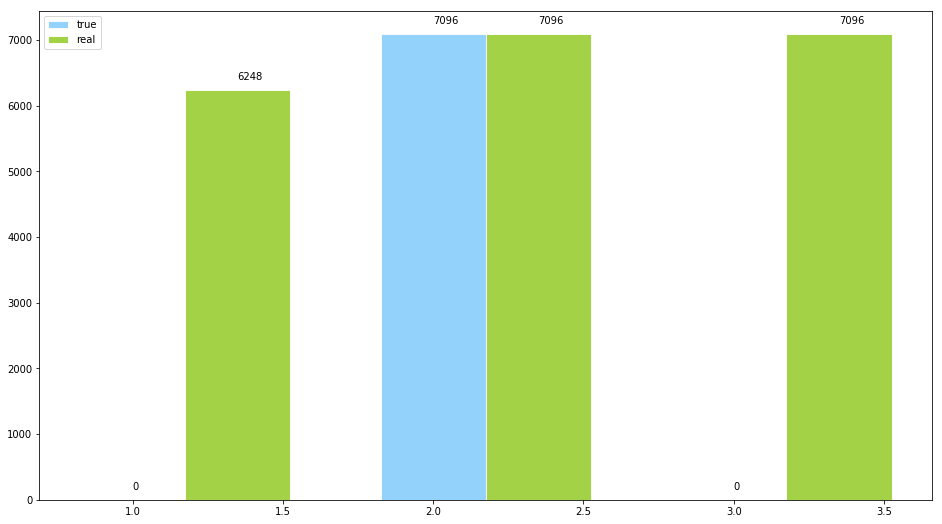

In [47]:
plt.figure(figsize=(16,9))
n = 3
X = np.arange(n)+1 #X是1,2,3柱的个数
Y1 = (a,b,c) # a = all b = 0.75 c = half
Y2 = (a_data,b_data,c_data)
plt.bar(X, Y1, alpha=0.9, width = 0.35, facecolor = 'lightskyblue', edgecolor = 'white', label='true', lw=1)
plt.bar(X+0.35, Y2, alpha=0.9, width = 0.35, facecolor = 'yellowgreen', edgecolor = 'white', label='real', lw=1)
i = 0
for y in Y1:
    plt.annotate("%s" % y, xy=(X[i],y), xytext=(0, 10), textcoords='offset points')
    i +=1
i = 0    
for y in Y2:
    plt.annotate("%s" % y, xy=(X[i]+0.35,y), xytext=(0, 10), textcoords='offset points')
    i +=1
plt.legend(loc="upper left") # label的位置在左上

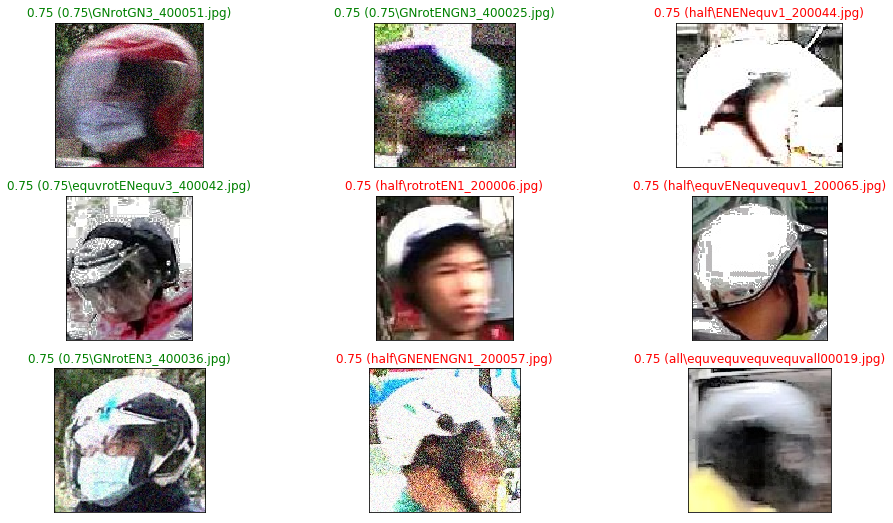

In [50]:
test_pic =[]
fig = plt.figure(figsize=(16,9))
for i, idx in enumerate(np.random.choice(range(0,len(filenames)), size=9, replace=False)):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    test_pic.append("D:/python-homework/final/test_model_picture_2/"+filenames[idx].replace("\\","/"))
    img = Image.open("D:/python-homework/final/test_model_picture_2/"+filenames[idx].replace("\\","/"))
    ax.imshow(img)
    n = filenames[idx].find("\\")
    ax.set_title("{} ({})".format(predictions[idx], filenames[idx]),
                 color=("green" if predictions[idx] == filenames[idx][:n] else "red"))

In [23]:
import aircv as ac

In [24]:
test_pic

['D:/python-homework/final/test_model_picture/0.75/GN08.jpg',
 'D:/python-homework/final/test_model_picture/0.75/02.jpg',
 'D:/python-homework/final/test_model_picture/half/EN09.jpg',
 'D:/python-homework/final/test_model_picture/all/06.jpg',
 'D:/python-homework/final/test_model_picture/half/EN07.jpg',
 'D:/python-homework/final/test_model_picture/all/08.jpg',
 'D:/python-homework/final/test_model_picture/half/04.jpg',
 'D:/python-homework/final/test_model_picture/0.75/GN10.jpg',
 'D:/python-homework/final/test_model_picture/all/GN05.jpg']

In [25]:
ori = ac.imread('D:/python-homework/final/100_source/100_source/from_video/pic00038.jpg')
small = ac.imread('D:/python-homework/final/test_model_picture_2/all/GNequvGNall00072.jpg')

In [26]:
pos = ac.find_template(ori, small)

In [27]:
pos

{'result': (1567.0, 315.5),
 'rectangle': ((1524, 260), (1524, 371), (1610, 260), (1610, 371)),
 'confidence': 0.5508398413658142}

In [28]:
color = (0, 255, 0)
line_width = 10
cv2.rectangle(ori,pos['rectangle'][0],pos['rectangle'][3], color, line_width)
cv2.imshow('objDetect', ori) 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [51]:
b = 4
for dicname in os.listdir(r"./"+"100_source/100_source/"):   
    print(dicname)
    for filename in os.listdir(r"./"+"100_source/100_source/"+dicname):
        print(filename) #just for test
        a = 0
        ori = ac.imread(r"./"+"100_source/100_source/"+dicname + "/" + filename)
        for i in test_pic :
            small = ac.imread(str(i))
            pos = ac.find_template(ori, small)
            if pos != None and pos["confidence"] >0.85:
                cv2.rectangle(ori,pos['rectangle'][0],pos['rectangle'][3], (0, 255, 0), 10)
                cv2.putText(ori, ("{} ({})".format(predictions[a], filenames[a])), pos['rectangle'][0],
                                  cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0,255), 1, cv2.LINE_AA)
                print(pos["confidence"])
                cv2.imwrite("D:/python-homework/final/result/"+str(b)+".jpg",ori)
                b += 1
                cv2.imshow('objDetect', ori) 
                
                cv2.waitKey(0)
                cv2.destroyAllWindows()
            a +=1
                

from_video
pic00001.jpg
pic00002.jpg
pic00003.jpg
pic00004.jpg
pic00005.jpg
pic00006.jpg
pic00007.jpg
pic00008.jpg
pic00009.jpg
pic00010.jpg
pic00011.jpg
pic00012.jpg
pic00013.jpg
pic00014.jpg
pic00015.jpg
pic00016.jpg
pic00017.jpg
pic00018.jpg
pic00019.jpg
pic00020.jpg
pic00021.jpg
pic00022.jpg
0.9567192792892456
pic00023.jpg
pic00024.jpg
pic00025.jpg
pic00026.jpg
pic00027.jpg
pic00028.jpg
pic00029.jpg
pic00030.jpg
pic00031.jpg
pic00032.jpg
pic00033.jpg
pic00034.jpg
pic00035.jpg
pic00036.jpg
pic00037.jpg
pic00038.jpg
pic00039.jpg
pic00040.jpg
pic00041.jpg
pic00042.jpg
pic00043.jpg
pic00044.jpg
pic00045.jpg
pic00046.jpg
pic00047.jpg
pic00048.jpg
pic00049.jpg
pic00050.jpg
pic00051.jpg
pic00052.jpg
pic00053.jpg
pic00054.jpg
pic00055.jpg
pic00056.jpg
pic00057.jpg
pic00058.jpg
pic00059.jpg
pic00060.jpg
pic00061.jpg
pic00062.jpg
pic00063.jpg
pic00064.jpg
pic00065.jpg
pic00066.jpg
pic00067.jpg
pic00068.jpg
pic00069.jpg
pic00070.jpg
pic00071.jpg
pic00072.jpg
pic00073.jpg
pic00074.jpg
pic00075

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\imgproc\src\templmatch.cpp:1112: error: (-215:Assertion failed) _img.size().height <= _templ.size().height && _img.size().width <= _templ.size().width in function 'cv::matchTemplate'


In [30]:
cv2.imshow('objDetect', small) 
cv2.imshow('objDetect',ori) 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
ac.find_template( small, ori)

{'result': (1723.0, 1336.0),
 'rectangle': ((923, 805), (923, 1867), (2523, 805), (2523, 1867)),
 'confidence': 0.7661241888999939}